## –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ ‚Ññ3: –†–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö –æ –≤–∏–¥–µ–æ–∏–≥—Ä–∞—Ö

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [4]:
# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ —Å—Ç–∏–ª—è –≥—Ä–∞—Ñ–∏–∫–æ–≤
plt.style.use('default')
sns.set_palette("husl")

In [8]:
## 1. –û–ø–∏—Å–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –∏ –∏—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –≤–æ–ø—Ä–æ—Å

# –°–æ–∑–¥–∞–µ–º –¥–∞—Ç–∞—Å–µ—Ç –≤–∏–¥–µ–æ–∏–≥—Ä –Ω–∞ –æ—Å–Ω–æ–≤–µ —Ä–µ–∞–ª—å–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
np.random.seed(42)
n_games = 150

In [10]:
# –ì–µ–Ω–µ—Ä–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ, –∏–º–∏—Ç–∏—Ä—É—é—â–∏–µ —Ä–µ–∞–ª—å–Ω—ã–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ –≤–∏–¥–µ–æ–∏–≥—Ä
data = {
    'game_id': range(1, n_games + 1),
    'critic_score': np.random.normal(75, 12, n_games),  # –û—Ü–µ–Ω–∫–∞ –∫—Ä–∏—Ç–∏–∫–æ–≤ (0-100)
    'user_score': np.random.normal(7.5, 1.2, n_games),  # –û—Ü–µ–Ω–∫–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π (0-10) 
    'price': np.random.gamma(2, 15) + 10,  # –¶–µ–Ω–∞ –∏–≥—Ä—ã (10-100$)
    'marketing_budget': np.random.gamma(1.5, 500000),  # –ú–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤—ã–π –±—é–¥–∂–µ—Ç
    'genre': np.random.choice(['Action', 'RPG', 'Strategy', 'Sports', 'Adventure'], n_games),
    'platform': np.random.choice(['PC', 'PlayStation', 'Xbox', 'Nintendo'], n_games)
}

In [12]:
# –°–æ–∑–¥–∞–µ–º –±–æ–ª–µ–µ —Ä–µ–∞–ª–∏—Å—Ç–∏—á–Ω—É—é —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é (–ø—Ä–æ–¥–∞–∂–∏)
# –ü—Ä–æ–¥–∞–∂–∏ –∑–∞–≤–∏—Å—è—Ç –æ—Ç –æ—Ü–µ–Ω–æ–∫ –∫—Ä–∏—Ç–∏–∫–æ–≤, –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –∏ –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤–æ–≥–æ –±—é–¥–∂–µ—Ç–∞
sales_base = (data['critic_score'] * 0.3 + 
              data['user_score'] * 10 * 0.4 + 
              data['marketing_budget'] / 100000 * 0.3)

# –î–æ–±–∞–≤–ª—è–µ–º —Å–ª—É—á–∞–π–Ω—ã–π —à—É–º –∏ –¥–µ–ª–∞–µ–º –ø—Ä–æ–¥–∞–∂–∏ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–º–∏
data['sales_millions'] = np.maximum(0.1, sales_base + np.random.normal(0, 15, n_games))

df = pd.DataFrame(data)

print("–û–ø–∏—Å–∞–Ω–∏–µ –¥–∞—Ç–∞—Å–µ—Ç–∞:")
print("–ò—Å—Ç–æ—á–Ω–∏–∫: –°–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ, —Å–æ–∑–¥–∞–Ω–Ω—ã–µ –Ω–∞ –æ—Å–Ω–æ–≤–µ —Ä–µ–∞–ª—å–Ω—ã—Ö —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫ –∏–≥—Ä–æ–≤–æ–π –∏–Ω–¥—É—Å—Ç—Ä–∏–∏")
print("–î–∞–Ω–Ω—ã–µ —Å–æ–¥–µ—Ä–∂–∞—Ç –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ 150 –≤–∏–¥–µ–æ–∏–≥—Ä–∞—Ö —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –∂–∞–Ω—Ä–æ–≤ –∏ –ø–ª–∞—Ç—Ñ–æ—Ä–º")
print("\n–ü–µ—Ä–µ–º–µ–Ω–Ω—ã–µ:")
print("- sales_millions: –ü—Ä–æ–¥–∞–∂–∏ –≤ –º–∏–ª–ª–∏–æ–Ω–∞—Ö –∫–æ–ø–∏–π (—Ü–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è)")
print("- critic_score: –û—Ü–µ–Ω–∫–∞ –∫—Ä–∏—Ç–∏–∫–æ–≤ (0-100)")
print("- user_score: –û—Ü–µ–Ω–∫–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π (0-10)")
print("- price: –¶–µ–Ω–∞ –∏–≥—Ä—ã –≤ –¥–æ–ª–ª–∞—Ä–∞—Ö")
print("- marketing_budget: –ú–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤—ã–π –±—é–¥–∂–µ—Ç –≤ –¥–æ–ª–ª–∞—Ä–∞—Ö")
print("- genre: –ñ–∞–Ω—Ä –∏–≥—Ä—ã")
print("- platform: –ò–≥—Ä–æ–≤–∞—è –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞")

print(f"\n–ò—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –≤–æ–ø—Ä–æ—Å:")
print("–ö–∞–∫–∏–µ —Ñ–∞–∫—Ç–æ—Ä—ã –∏–∑ –∏–º–µ—é—â–∏—Ö—Å—è –≤ –¥–∞–Ω–Ω—ã—Ö —Å–≤—è–∑–∞–Ω—ã —Å –æ–±—ä–µ–º–æ–º –ø—Ä–æ–¥–∞–∂ –≤–∏–¥–µ–æ–∏–≥—Ä –∏ –∫–∞–∫ –∏–º–µ–Ω–Ω–æ?")
print("–í–ª–∏—è—é—Ç –ª–∏ –æ—Ü–µ–Ω–∫–∏ –∫—Ä–∏—Ç–∏–∫–æ–≤ –∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –Ω–∞ –∫–æ–º–º–µ—Ä—á–µ—Å–∫–∏–π —É—Å–ø–µ—Ö –∏–≥—Ä—ã?")

–û–ø–∏—Å–∞–Ω–∏–µ –¥–∞—Ç–∞—Å–µ—Ç–∞:
–ò—Å—Ç–æ—á–Ω–∏–∫: –°–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ, —Å–æ–∑–¥–∞–Ω–Ω—ã–µ –Ω–∞ –æ—Å–Ω–æ–≤–µ —Ä–µ–∞–ª—å–Ω—ã—Ö —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫ –∏–≥—Ä–æ–≤–æ–π –∏–Ω–¥—É—Å—Ç—Ä–∏–∏
–î–∞–Ω–Ω—ã–µ —Å–æ–¥–µ—Ä–∂–∞—Ç –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ 150 –≤–∏–¥–µ–æ–∏–≥—Ä–∞—Ö —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –∂–∞–Ω—Ä–æ–≤ –∏ –ø–ª–∞—Ç—Ñ–æ—Ä–º

–ü–µ—Ä–µ–º–µ–Ω–Ω—ã–µ:
- sales_millions: –ü—Ä–æ–¥–∞–∂–∏ –≤ –º–∏–ª–ª–∏–æ–Ω–∞—Ö –∫–æ–ø–∏–π (—Ü–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è)
- critic_score: –û—Ü–µ–Ω–∫–∞ –∫—Ä–∏—Ç–∏–∫–æ–≤ (0-100)
- user_score: –û—Ü–µ–Ω–∫–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π (0-10)
- price: –¶–µ–Ω–∞ –∏–≥—Ä—ã –≤ –¥–æ–ª–ª–∞—Ä–∞—Ö
- marketing_budget: –ú–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤—ã–π –±—é–¥–∂–µ—Ç –≤ –¥–æ–ª–ª–∞—Ä–∞—Ö
- genre: –ñ–∞–Ω—Ä –∏–≥—Ä—ã
- platform: –ò–≥—Ä–æ–≤–∞—è –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞

–ò—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –≤–æ–ø—Ä–æ—Å:
–ö–∞–∫–∏–µ —Ñ–∞–∫—Ç–æ—Ä—ã –∏–∑ –∏–º–µ—é—â–∏—Ö—Å—è –≤ –¥–∞–Ω–Ω—ã—Ö —Å–≤—è–∑–∞–Ω—ã —Å –æ–±—ä–µ–º–æ–º –ø—Ä–æ–¥–∞–∂ –≤–∏–¥–µ–æ–∏–≥—Ä –∏ –∫–∞–∫ –∏–º–µ–Ω–Ω–æ?
–í–ª–∏—è—é—Ç –ª


2. –ò–ó–£–ß–ï–ù–ò–ï –î–ê–ù–ù–´–• –ò –ü–†–ï–ü–†–û–¶–ï–°–°–ò–ù–ì
2.1. –û–±—â–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –¥–∞–Ω–Ω—ã—Ö:
–†–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞: (150, 8)

–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   game_id           150 non-null    int64  
 1   critic_score      150 non-null    float64
 2   user_score        150 non-null    float64
 3   price             150 non-null    float64
 4   marketing_budget  150 non-null    float64
 5   genre             150 non-null    object 
 6   platform          150 non-null    object 
 7   sales_millions    150 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 9.5+ KB
None

–ü–µ—Ä–≤—ã–µ 5 —Å—Ç—Ä–æ–∫:
   game_id  critic_score  user_score      price  marketing_budget     genre  \
0        1     80.960570    7.800591  22.137579

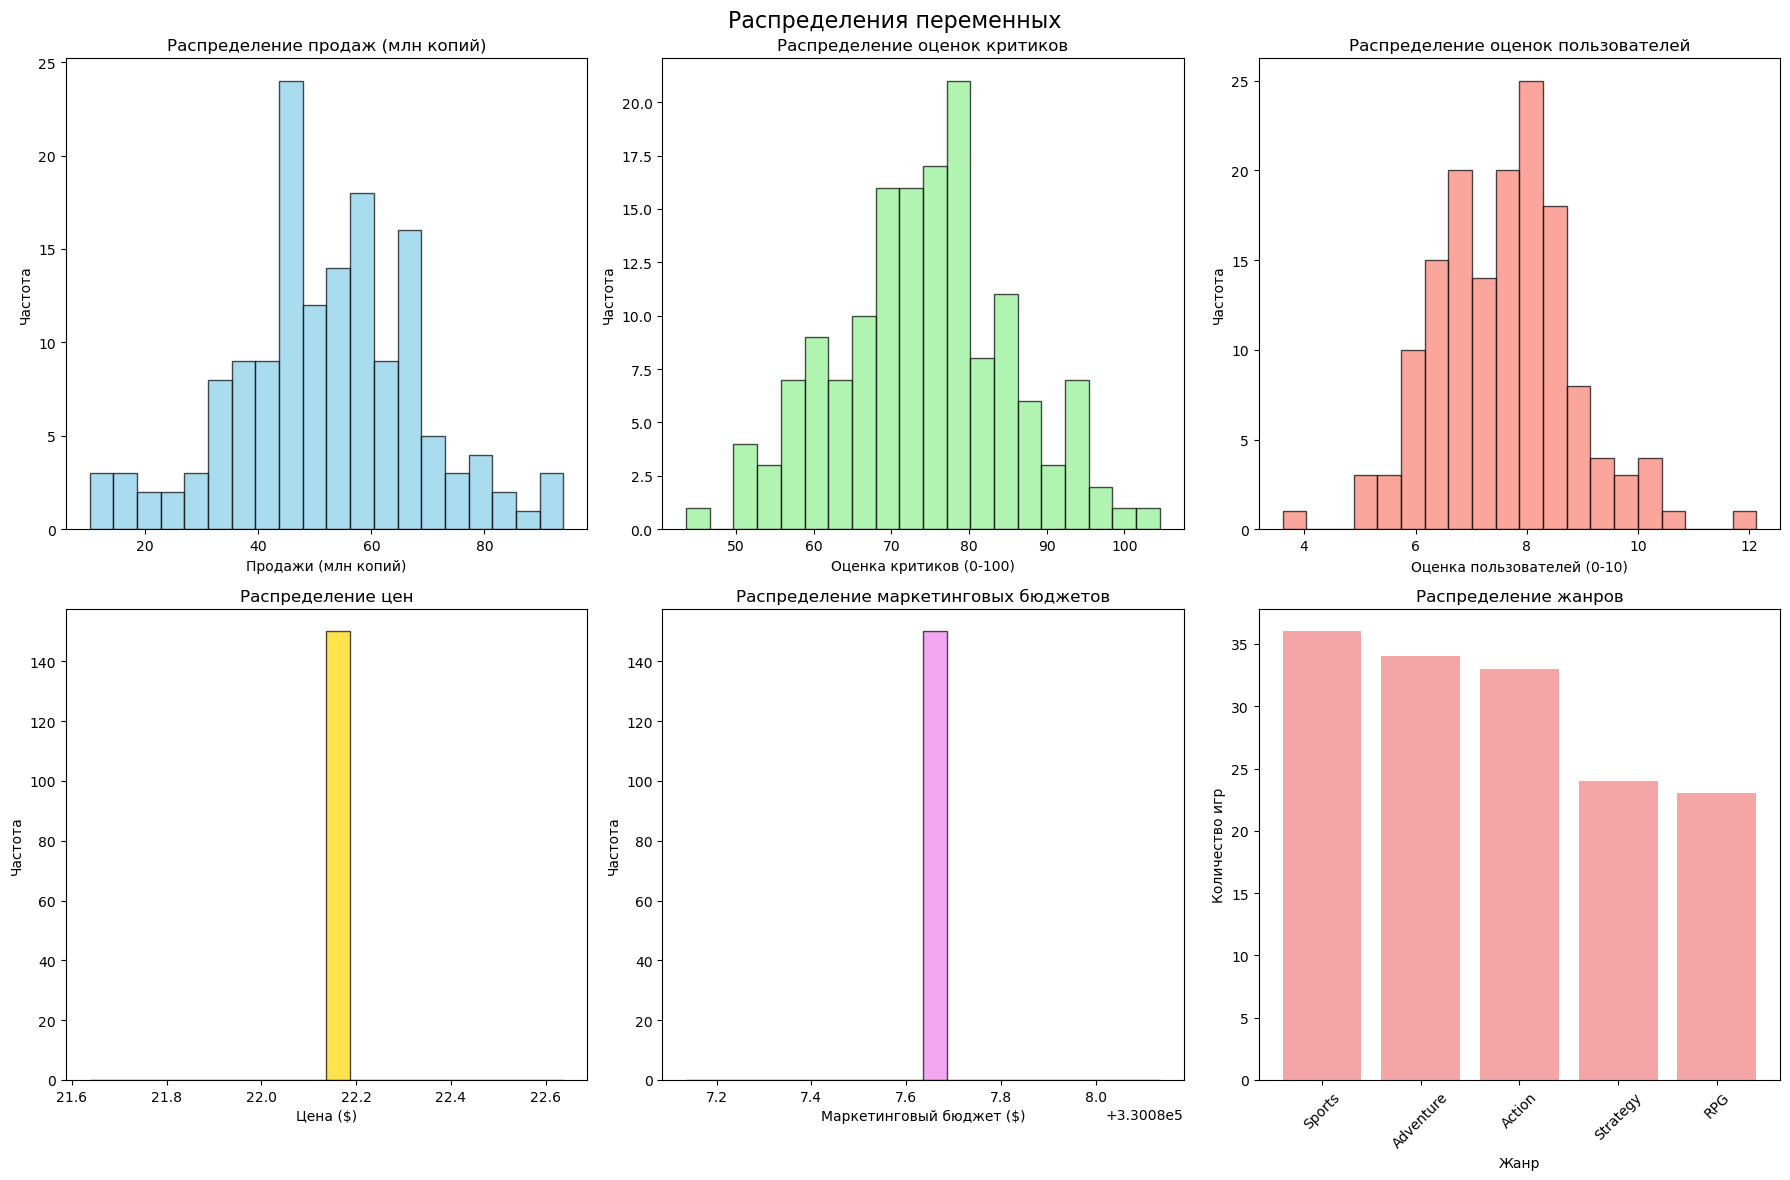

In [14]:
## 2. –ò–∑—É—á–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –∏ –ø—Ä–µ–ø—Ä–æ—Ü–µ—Å—Å–∏–Ω–≥

print(f"\n{'='*60}")
print("2. –ò–ó–£–ß–ï–ù–ò–ï –î–ê–ù–ù–´–• –ò –ü–†–ï–ü–†–û–¶–ï–°–°–ò–ù–ì")
print(f"{'='*60}")

# –û—Å–Ω–æ–≤–Ω–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –¥–∞—Ç–∞—Å–µ—Ç–µ
print("2.1. –û–±—â–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –¥–∞–Ω–Ω—ã—Ö:")
print(f"–†–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞: {df.shape}")
print(f"\n–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö:")
print(df.info())

print(f"\n–ü–µ—Ä–≤—ã–µ 5 —Å—Ç—Ä–æ–∫:")
print(df.head())

# –ü—Ä–æ–≤–µ—Ä–∫–∞ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤
duplicates = df.duplicated().sum()
print(f"\n2.2. –ü—Ä–æ–≤–µ—Ä–∫–∞ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤:")
print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤: {duplicates}")

# –ü—Ä–æ–≤–µ—Ä–∫–∞ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
print(f"\n2.3. –ü—Ä–æ–≤–µ—Ä–∫–∞ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π:")
missing_values = df.isnull().sum()
print(missing_values)
if missing_values.sum() == 0:
    print("–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–æ.")

# –û–ø–∏—Å–∞—Ç–µ–ª—å–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –¥–ª—è —á–∏—Å–ª–æ–≤—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
print(f"\n2.4. –û–ø–∏—Å–∞—Ç–µ–ª—å–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –¥–ª—è —á–∏—Å–ª–æ–≤—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö:")
numerical_cols = ['sales_millions', 'critic_score', 'user_score', 'price', 'marketing_budget']
print(df[numerical_cols].describe())

# –ò–∑—É—á–µ–Ω–∏–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∫–∞–∂–¥–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
print(f"\n2.5. –ê–Ω–∞–ª–∏–∑ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö:")

# –°–æ–∑–¥–∞–µ–º —Ñ–∏–≥—É—Ä—É –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö', fontsize=16)

# –¶–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è - –ø—Ä–æ–¥–∞–∂–∏
axes[0, 0].hist(df['sales_millions'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–æ–¥–∞–∂ (–º–ª–Ω –∫–æ–ø–∏–π)')
axes[0, 0].set_xlabel('–ü—Ä–æ–¥–∞–∂–∏ (–º–ª–Ω –∫–æ–ø–∏–π)')
axes[0, 0].set_ylabel('–ß–∞—Å—Ç–æ—Ç–∞')

# –û—Ü–µ–Ω–∫–∞ –∫—Ä–∏—Ç–∏–∫–æ–≤
axes[0, 1].hist(df['critic_score'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Ü–µ–Ω–æ–∫ –∫—Ä–∏—Ç–∏–∫–æ–≤')
axes[0, 1].set_xlabel('–û—Ü–µ–Ω–∫–∞ –∫—Ä–∏—Ç–∏–∫–æ–≤ (0-100)')
axes[0, 1].set_ylabel('–ß–∞—Å—Ç–æ—Ç–∞')

# –û—Ü–µ–Ω–∫–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π
axes[0, 2].hist(df['user_score'], bins=20, alpha=0.7, color='salmon', edgecolor='black')
axes[0, 2].set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Ü–µ–Ω–æ–∫ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π')
axes[0, 2].set_xlabel('–û—Ü–µ–Ω–∫–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π (0-10)')
axes[0, 2].set_ylabel('–ß–∞—Å—Ç–æ—Ç–∞')

# –¶–µ–Ω–∞
axes[1, 0].hist(df['price'], bins=20, alpha=0.7, color='gold', edgecolor='black')
axes[1, 0].set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–Ω')
axes[1, 0].set_xlabel('–¶–µ–Ω–∞ ($)')
axes[1, 0].set_ylabel('–ß–∞—Å—Ç–æ—Ç–∞')

# –ú–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤—ã–π –±—é–¥–∂–µ—Ç
axes[1, 1].hist(df['marketing_budget'], bins=20, alpha=0.7, color='violet', edgecolor='black')
axes[1, 1].set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤—ã—Ö –±—é–¥–∂–µ—Ç–æ–≤')
axes[1, 1].set_xlabel('–ú–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤—ã–π –±—é–¥–∂–µ—Ç ($)')
axes[1, 1].set_ylabel('–ß–∞—Å—Ç–æ—Ç–∞')

# –ñ–∞–Ω—Ä—ã (–∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è)
genre_counts = df['genre'].value_counts()
axes[1, 2].bar(genre_counts.index, genre_counts.values, color='lightcoral', alpha=0.7)
axes[1, 2].set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∂–∞–Ω—Ä–æ–≤')
axes[1, 2].set_xlabel('–ñ–∞–Ω—Ä')
axes[1, 2].set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–≥—Ä')
axes[1, 2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

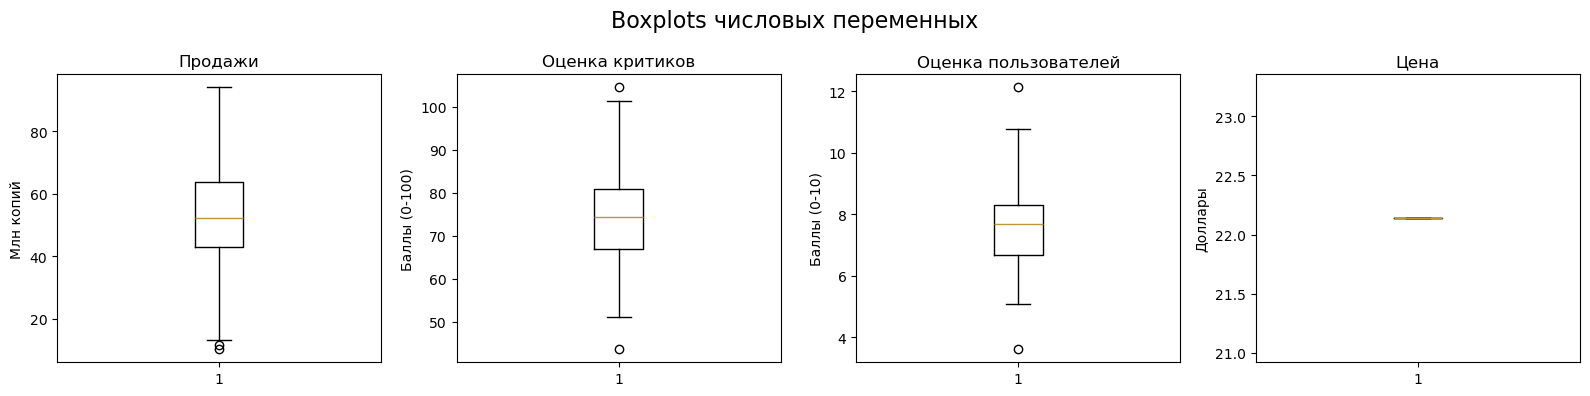

In [16]:
# Boxplots –¥–ª—è —á–∏—Å–ª–æ–≤—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
fig.suptitle('Boxplots —á–∏—Å–ª–æ–≤—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö', fontsize=16)

axes[0].boxplot(df['sales_millions'])
axes[0].set_title('–ü—Ä–æ–¥–∞–∂–∏')
axes[0].set_ylabel('–ú–ª–Ω –∫–æ–ø–∏–π')

axes[1].boxplot(df['critic_score'])
axes[1].set_title('–û—Ü–µ–Ω–∫–∞ –∫—Ä–∏—Ç–∏–∫–æ–≤')
axes[1].set_ylabel('–ë–∞–ª–ª—ã (0-100)')

axes[2].boxplot(df['user_score'])
axes[2].set_title('–û—Ü–µ–Ω–∫–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π')
axes[2].set_ylabel('–ë–∞–ª–ª—ã (0-10)')

axes[3].boxplot(df['price'])
axes[3].set_title('–¶–µ–Ω–∞')
axes[3].set_ylabel('–î–æ–ª–ª–∞—Ä—ã')

plt.tight_layout()
plt.show()


2.6. –ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑:
–ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞:
                  sales_millions  critic_score  user_score  price  \
sales_millions             1.000         0.183       0.321    NaN   
critic_score               0.183         1.000      -0.024    NaN   
user_score                 0.321        -0.024       1.000    NaN   
price                        NaN           NaN         NaN    NaN   
marketing_budget             NaN           NaN         NaN    NaN   

                  marketing_budget  
sales_millions                 NaN  
critic_score                   NaN  
user_score                     NaN  
price                          NaN  
marketing_budget               NaN  


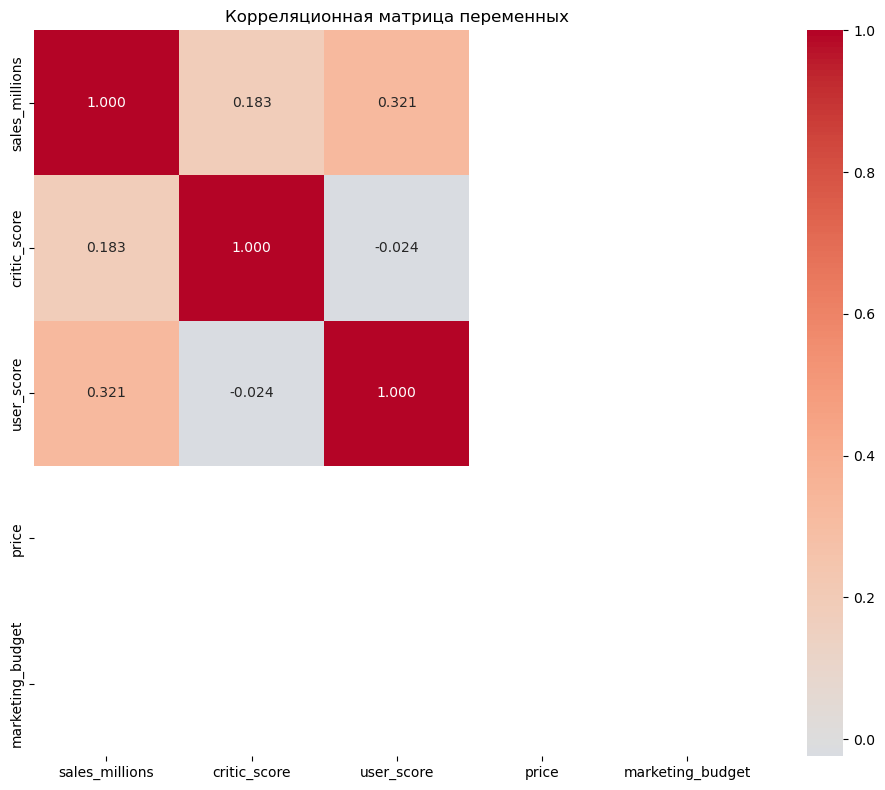

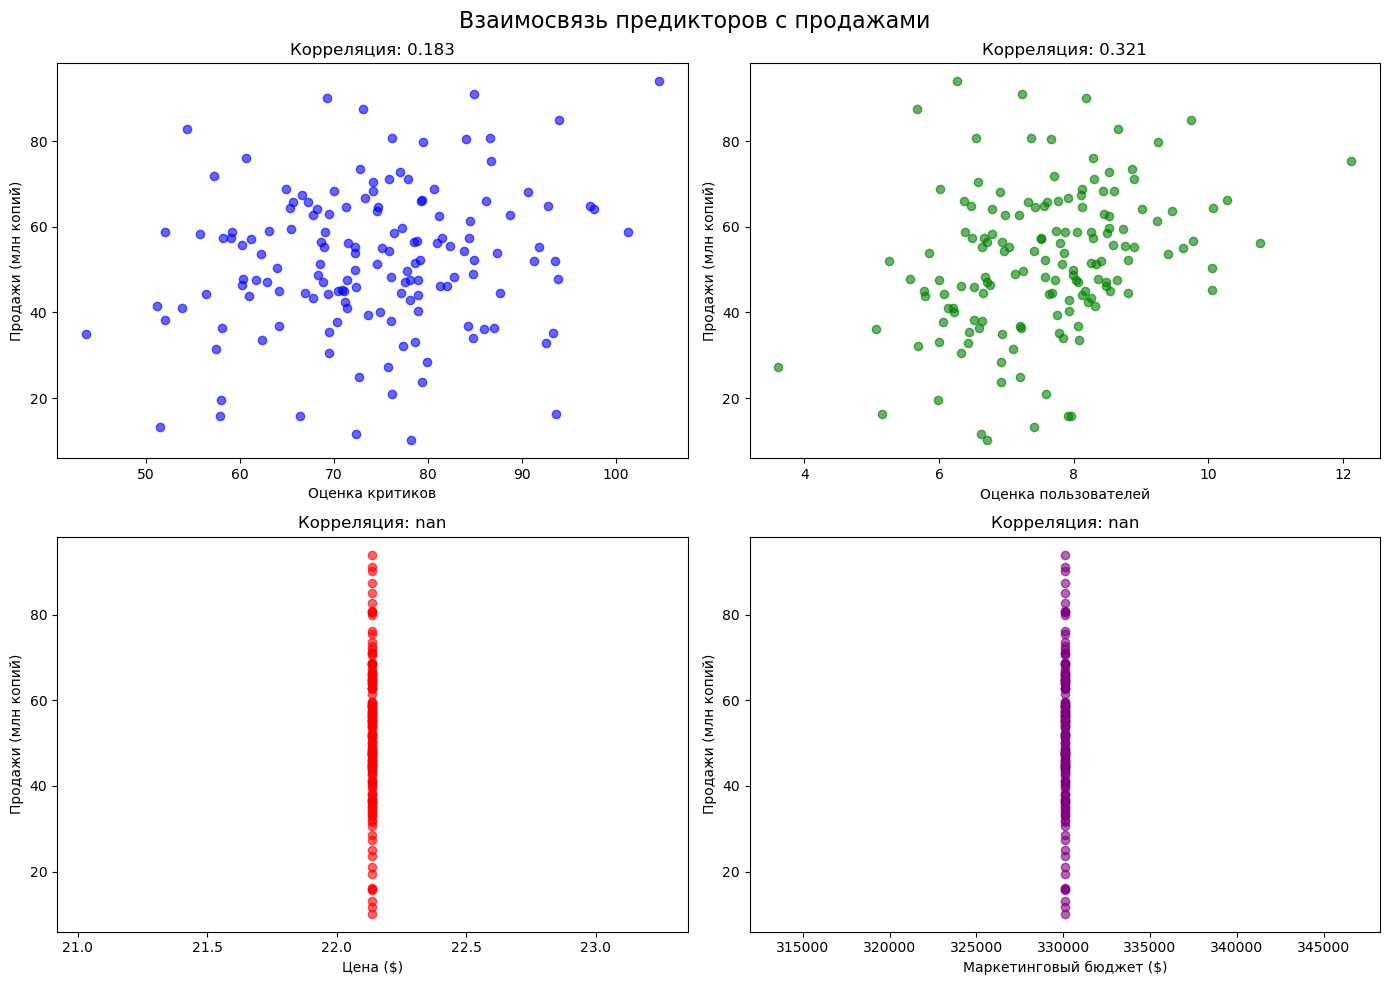

In [18]:
## 2.6. –ò–∑—É—á–µ–Ω–∏–µ –≤–∑–∞–∏–º–æ—Å–≤—è–∑–µ–π –º–µ–∂–¥—É –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏

print(f"\n2.6. –ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑:")

# –ú–∞—Ç—Ä–∏—Ü–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π –¥–ª—è —á–∏—Å–ª–æ–≤—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
correlation_matrix = df[numerical_cols].corr()
print("–ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞:")
print(correlation_matrix.round(3))

# –¢–µ–ø–ª–æ–≤–∞—è –∫–∞—Ä—Ç–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f')
plt.title('–ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö')
plt.tight_layout()
plt.show()

# –ü–∞—Ä–Ω—ã–µ scatterplots —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('–í–∑–∞–∏–º–æ—Å–≤—è–∑—å –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä–æ–≤ —Å –ø—Ä–æ–¥–∞–∂–∞–º–∏', fontsize=16)

# –ü—Ä–æ–¥–∞–∂–∏ vs –û—Ü–µ–Ω–∫–∞ –∫—Ä–∏—Ç–∏–∫–æ–≤
axes[0, 0].scatter(df['critic_score'], df['sales_millions'], alpha=0.6, color='blue')
axes[0, 0].set_xlabel('–û—Ü–µ–Ω–∫–∞ –∫—Ä–∏—Ç–∏–∫–æ–≤')
axes[0, 0].set_ylabel('–ü—Ä–æ–¥–∞–∂–∏ (–º–ª–Ω –∫–æ–ø–∏–π)')
axes[0, 0].set_title(f'–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è: {correlation_matrix.loc["sales_millions", "critic_score"]:.3f}')

# –ü—Ä–æ–¥–∞–∂–∏ vs –û—Ü–µ–Ω–∫–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π
axes[0, 1].scatter(df['user_score'], df['sales_millions'], alpha=0.6, color='green')
axes[0, 1].set_xlabel('–û—Ü–µ–Ω–∫–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π')
axes[0, 1].set_ylabel('–ü—Ä–æ–¥–∞–∂–∏ (–º–ª–Ω –∫–æ–ø–∏–π)')
axes[0, 1].set_title(f'–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è: {correlation_matrix.loc["sales_millions", "user_score"]:.3f}')

# –ü—Ä–æ–¥–∞–∂–∏ vs –¶–µ–Ω–∞
axes[1, 0].scatter(df['price'], df['sales_millions'], alpha=0.6, color='red')
axes[1, 0].set_xlabel('–¶–µ–Ω–∞ ($)')
axes[1, 0].set_ylabel('–ü—Ä–æ–¥–∞–∂–∏ (–º–ª–Ω –∫–æ–ø–∏–π)')
axes[1, 0].set_title(f'–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è: {correlation_matrix.loc["sales_millions", "price"]:.3f}')

# –ü—Ä–æ–¥–∞–∂–∏ vs –ú–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤—ã–π –±—é–¥–∂–µ—Ç
axes[1, 1].scatter(df['marketing_budget'], df['sales_millions'], alpha=0.6, color='purple')
axes[1, 1].set_xlabel('–ú–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤—ã–π –±—é–¥–∂–µ—Ç ($)')
axes[1, 1].set_ylabel('–ü—Ä–æ–¥–∞–∂–∏ (–º–ª–Ω –∫–æ–ø–∏–π)')
axes[1, 1].set_title(f'–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è: {correlation_matrix.loc["sales_millions", "marketing_budget"]:.3f}')

plt.tight_layout()
plt.show()


2.7. –ê–Ω–∞–ª–∏–∑ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö:
–°—Ä–µ–¥–Ω–∏–µ –ø—Ä–æ–¥–∞–∂–∏ –ø–æ –∂–∞–Ω—Ä–∞–º:
            mean  count
genre                  
Action     49.49     33
Adventure  54.16     34
RPG        54.79     23
Sports     53.67     36
Strategy   47.59     24

–°—Ä–µ–¥–Ω–∏–µ –ø—Ä–æ–¥–∞–∂–∏ –ø–æ –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞–º:
              mean  count
platform                 
Nintendo     52.21     23
PC           52.70     47
PlayStation  51.24     43
Xbox         52.10     37


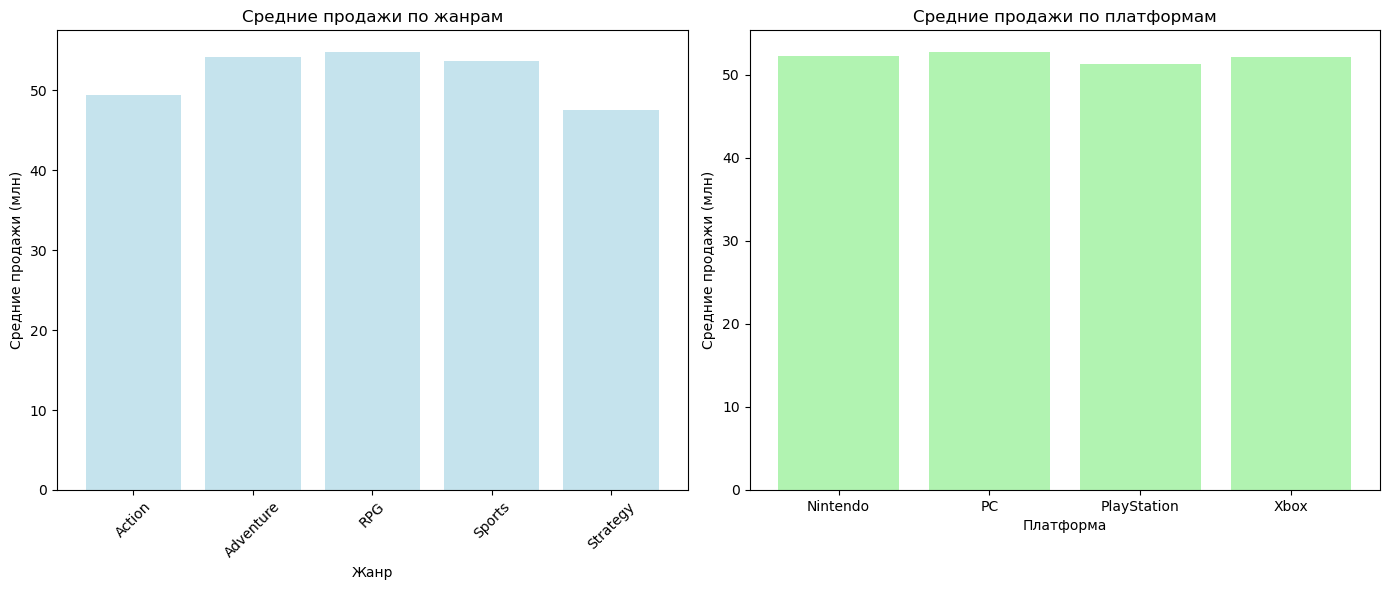

In [20]:
# –ê–Ω–∞–ª–∏–∑ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
print(f"\n2.7. –ê–Ω–∞–ª–∏–∑ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö:")

# –°—Ä–µ–¥–Ω–∏–µ –ø—Ä–æ–¥–∞–∂–∏ –ø–æ –∂–∞–Ω—Ä–∞–º
print("–°—Ä–µ–¥–Ω–∏–µ –ø—Ä–æ–¥–∞–∂–∏ –ø–æ –∂–∞–Ω—Ä–∞–º:")
genre_sales = df.groupby('genre')['sales_millions'].agg(['mean', 'count']).round(2)
print(genre_sales)

# –°—Ä–µ–¥–Ω–∏–µ –ø—Ä–æ–¥–∞–∂–∏ –ø–æ –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞–º
print("\n–°—Ä–µ–¥–Ω–∏–µ –ø—Ä–æ–¥–∞–∂–∏ –ø–æ –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞–º:")
platform_sales = df.groupby('platform')['sales_millions'].agg(['mean', 'count']).round(2)
print(platform_sales)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –ø—Ä–æ–¥–∞–∂ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# –ü—Ä–æ–¥–∞–∂–∏ –ø–æ –∂–∞–Ω—Ä–∞–º
axes[0].bar(genre_sales.index, genre_sales['mean'], alpha=0.7, color='lightblue')
axes[0].set_title('–°—Ä–µ–¥–Ω–∏–µ –ø—Ä–æ–¥–∞–∂–∏ –ø–æ –∂–∞–Ω—Ä–∞–º')
axes[0].set_xlabel('–ñ–∞–Ω—Ä')
axes[0].set_ylabel('–°—Ä–µ–¥–Ω–∏–µ –ø—Ä–æ–¥–∞–∂–∏ (–º–ª–Ω)')
axes[0].tick_params(axis='x', rotation=45)

# –ü—Ä–æ–¥–∞–∂–∏ –ø–æ –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞–º
axes[1].bar(platform_sales.index, platform_sales['mean'], alpha=0.7, color='lightgreen')
axes[1].set_title('–°—Ä–µ–¥–Ω–∏–µ –ø—Ä–æ–¥–∞–∂–∏ –ø–æ –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞–º')
axes[1].set_xlabel('–ü–ª–∞—Ç—Ñ–æ—Ä–º–∞')
axes[1].set_ylabel('–°—Ä–µ–¥–Ω–∏–µ –ø—Ä–æ–¥–∞–∂–∏ (–º–ª–Ω)')

plt.tight_layout()
plt.show()


In [24]:
## 2.8. –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è

print(f"\n2.8. –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è:")

# –í—Å–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ —É–∂–µ –≤ —á–∏—Å–ª–æ–≤–æ–º —Ñ–æ—Ä–º–∞—Ç–µ
# –í—ã–±–∏—Ä–∞–µ–º –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é —Å –Ω–∞–∏–±–æ–ª—å—à–µ–π –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–µ–π —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
target_correlations = correlation_matrix['sales_millions'].abs().sort_values(ascending=False)
print("–ö–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä–æ–≤ —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π (–ø–æ –º–æ–¥—É–ª—é):")
print(target_correlations[1:])  # –ò—Å–∫–ª—é—á–∞–µ–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é —Å —Å–∞–º–æ–π —Å–æ–±–æ–π

strongest_predictor = target_correlations.index[1]  # –ü–µ—Ä–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è –ø–æ—Å–ª–µ sales_millions
print(f"\n–ü–µ—Ä–µ–º–µ–Ω–Ω–∞—è —Å –Ω–∞–∏–±–æ–ª—å—à–µ–π –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–µ–π: {strongest_predictor}")
print(f"–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏: {target_correlations[strongest_predictor]:.3f}")


2.8. –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è:
–ö–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä–æ–≤ —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π (–ø–æ –º–æ–¥—É–ª—é):
user_score          0.320932
critic_score        0.183304
price                    NaN
marketing_budget         NaN
Name: sales_millions, dtype: float64

–ü–µ—Ä–µ–º–µ–Ω–Ω–∞—è —Å –Ω–∞–∏–±–æ–ª—å—à–µ–π –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–µ–π: user_score
–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏: 0.321



3. –ü–ê–†–ù–ê–Ø –õ–ò–ù–ï–ô–ù–ê–Ø –†–ï–ì–†–ï–°–°–ò–Ø
3.1. –†–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø–∞—Ä–Ω–æ–π –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     16.99
Date:                Sat, 30 Aug 2025   Prob (F-statistic):           6.22e-05
Time:                        09:58:35   Log-Likelihood:                -625.23
No. Observations:                 150   AIC:                             1254.
Df Residuals:                     148   BIC:                             1260.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--

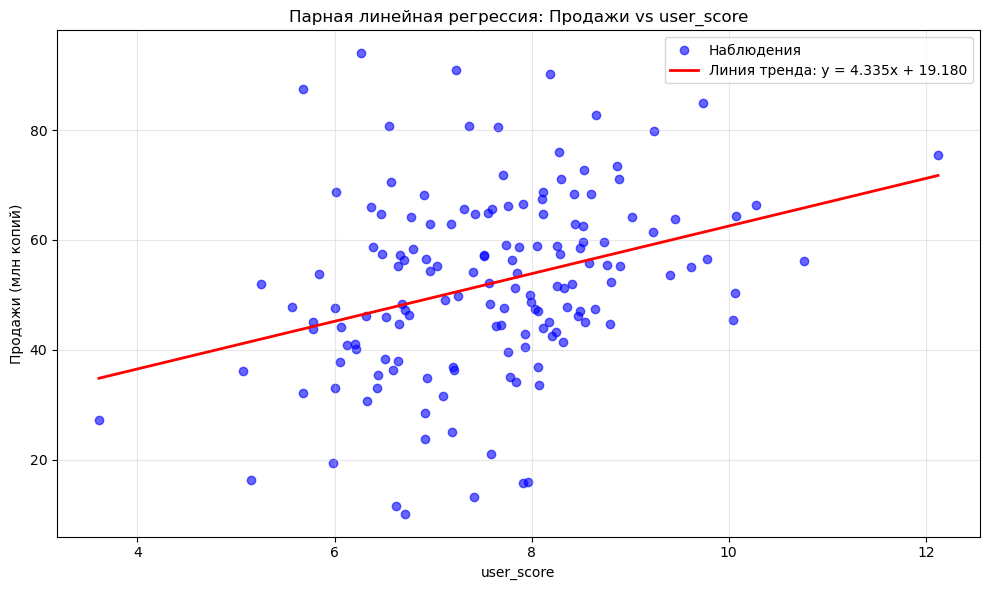

In [28]:
## 3. –ü–∞—Ä–Ω–∞—è –ª–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è

print(f"\n{'='*60}")
print("3. –ü–ê–†–ù–ê–Ø –õ–ò–ù–ï–ô–ù–ê–Ø –†–ï–ì–†–ï–°–°–ò–Ø")
print(f"{'='*60}")

# –°—Ç—Ä–æ–∏–º –ø–∞—Ä–Ω—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é —Å –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π, –∏–º–µ—é—â–µ–π –Ω–∞–∏–±–æ–ª—å—à—É—é –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é
X1 = df[strongest_predictor].values.reshape(-1, 1)
y = df['sales_millions'].values

# –ò—Å–ø–æ–ª—å–∑—É–µ–º statsmodels –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –¥–µ—Ç–∞–ª—å–Ω–æ–π —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏
X1_sm = sm.add_constant(df[strongest_predictor])  # –î–æ–±–∞–≤–ª—è–µ–º –∫–æ–Ω—Å—Ç–∞–Ω—Ç—É –¥–ª—è intercept
model1 = sm.OLS(y, X1_sm).fit()

print("3.1. –†–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø–∞—Ä–Ω–æ–π –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏:")
print(model1.summary())

# –ò–∑–≤–ª–µ–∫–∞–µ–º –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã
intercept = model1.params[0]
slope = model1.params[1]
r_squared = model1.rsquared

print(f"\n3.2. –õ–∏–Ω–µ–π–Ω–æ–µ —É—Ä–∞–≤–Ω–µ–Ω–∏–µ:")
print(f"sales_millions = {slope:.4f} √ó {strongest_predictor} + {intercept:.4f}")

print(f"\n3.3. –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤:")
print(f"–ö–æ–Ω—Å—Ç–∞–Ω—Ç–∞ (intercept): {intercept:.4f}")
print(f"  - –û–∂–∏–¥–∞–µ–º—ã–µ –ø—Ä–æ–¥–∞–∂–∏ –ø—Ä–∏ {strongest_predictor} = 0 —Å–æ—Å—Ç–∞–≤–ª—è—é—Ç {intercept:.2f} –º–ª–Ω –∫–æ–ø–∏–π")

print(f"–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –ø—Ä–∏ {strongest_predictor}: {slope:.4f}")
if model1.pvalues[1] < 0.05:
    significance = "—Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–æ"
else:
    significance = "—Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –ù–ï –∑–Ω–∞—á–∏–º–æ"
    
print(f"  - –ü—Ä–∏ —É–≤–µ–ª–∏—á–µ–Ω–∏–∏ {strongest_predictor} –Ω–∞ 1 –µ–¥–∏–Ω–∏—Ü—É, –ø—Ä–æ–¥–∞–∂–∏ –∏–∑–º–µ–Ω—è—é—Ç—Å—è –Ω–∞ {slope:.4f} –º–ª–Ω –∫–æ–ø–∏–π")
print(f"  - –≠—Ç–æ –∏–∑–º–µ–Ω–µ–Ω–∏–µ {significance} (p-value = {model1.pvalues[1]:.4f})")

print(f"\n3.4. –ö–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏:")
print(f"R¬≤ = {r_squared:.4f}")
print(f"  - –ú–æ–¥–µ–ª—å –æ–±—ä—è—Å–Ω—è–µ—Ç {r_squared*100:.1f}% –≤–∞—Ä–∏–∞—Ü–∏–∏ –≤ –ø—Ä–æ–¥–∞–∂–∞—Ö")
# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ scatterplot —Å –ª–∏–Ω–∏–µ–π —Ç—Ä–µ–Ω–¥–∞
plt.figure(figsize=(10, 6))
plt.scatter(df[strongest_predictor], df['sales_millions'], alpha=0.6, color='blue', label='–ù–∞–±–ª—é–¥–µ–Ω–∏—è')

# –õ–∏–Ω–∏—è —Ç—Ä–µ–Ω–¥–∞
x_line = np.linspace(df[strongest_predictor].min(), df[strongest_predictor].max(), 100)
y_line = slope * x_line + intercept
plt.plot(x_line, y_line, color='red', linewidth=2, label=f'–õ–∏–Ω–∏—è —Ç—Ä–µ–Ω–¥–∞: y = {slope:.3f}x + {intercept:.3f}')

plt.xlabel(f'{strongest_predictor}')
plt.ylabel('–ü—Ä–æ–¥–∞–∂–∏ (–º–ª–Ω –∫–æ–ø–∏–π)')
plt.title(f'–ü–∞—Ä–Ω–∞—è –ª–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è: –ü—Ä–æ–¥–∞–∂–∏ vs {strongest_predictor}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [30]:
print(f"\n3.5. –í—ã–≤–æ–¥—ã –æ –≤–∑–∞–∏–º–æ—Å–≤—è–∑–∏:")
if slope > 0:
    direction = "–ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è"
else:
    direction = "–æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–∞—è"
    
print(f"–ú–µ–∂–¥—É {strongest_predictor} –∏ –ø—Ä–æ–¥–∞–∂–∞–º–∏ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∞ {direction} –≤–∑–∞–∏–º–æ—Å–≤—è–∑—å.")
print(f"–°–∏–ª–∞ —Å–≤—è–∑–∏: {target_correlations[strongest_predictor]:.3f} (–∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è)")
if model1.pvalues[1] < 0.05:
    print("–°–≤—è–∑—å —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–∞ –Ω–∞ —É—Ä–æ–≤–Ω–µ 0.05")
else:
    print("–°–≤—è–∑—å —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –ù–ï –∑–Ω–∞—á–∏–º–∞ –Ω–∞ —É—Ä–æ–≤–Ω–µ 0.05")

print(f"\n3.6. –ê–¥–µ–∫–≤–∞—Ç–Ω–æ—Å—Ç—å —Å–ø–µ—Ü–∏—Ñ–∏–∫–∞—Ü–∏–∏ –º–æ–¥–µ–ª–∏:")
print("–î–∞–Ω–Ω–∞—è –ø–∞—Ä–Ω–∞—è –º–æ–¥–µ–ª—å –º–æ–∂–µ—Ç –±—ã—Ç—å —É–ø—Ä–æ—â–µ–Ω–Ω–æ–π, —Ç–∞–∫ –∫–∞–∫ –Ω–∞ –ø—Ä–æ–¥–∞–∂–∏ –∏–≥—Ä")
print("–≤–ª–∏—è—é—Ç –º–Ω–æ–∂–µ—Å—Ç–≤–æ —Ñ–∞–∫—Ç–æ—Ä–æ–≤. –ú–æ–¥–µ–ª—å –æ–±—ä—è—Å–Ω—è–µ—Ç —Ç–æ–ª—å–∫–æ —á–∞—Å—Ç—å –≤–∞—Ä–∏–∞—Ü–∏–∏.")
print("–†–µ–∫–æ–º–µ–Ω–¥—É–µ—Ç—Å—è –¥–æ–±–∞–≤–∏—Ç—å –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä—ã –¥–ª—è —É–ª—É—á—à–µ–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–∞.")


3.5. –í—ã–≤–æ–¥—ã –æ –≤–∑–∞–∏–º–æ—Å–≤—è–∑–∏:
–ú–µ–∂–¥—É user_score –∏ –ø—Ä–æ–¥–∞–∂–∞–º–∏ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∞ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è –≤–∑–∞–∏–º–æ—Å–≤—è–∑—å.
–°–∏–ª–∞ —Å–≤—è–∑–∏: 0.321 (–∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è)
–°–≤—è–∑—å —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–∞ –Ω–∞ —É—Ä–æ–≤–Ω–µ 0.05

3.6. –ê–¥–µ–∫–≤–∞—Ç–Ω–æ—Å—Ç—å —Å–ø–µ—Ü–∏—Ñ–∏–∫–∞—Ü–∏–∏ –º–æ–¥–µ–ª–∏:
–î–∞–Ω–Ω–∞—è –ø–∞—Ä–Ω–∞—è –º–æ–¥–µ–ª—å –º–æ–∂–µ—Ç –±—ã—Ç—å —É–ø—Ä–æ—â–µ–Ω–Ω–æ–π, —Ç–∞–∫ –∫–∞–∫ –Ω–∞ –ø—Ä–æ–¥–∞–∂–∏ –∏–≥—Ä
–≤–ª–∏—è—é—Ç –º–Ω–æ–∂–µ—Å—Ç–≤–æ —Ñ–∞–∫—Ç–æ—Ä–æ–≤. –ú–æ–¥–µ–ª—å –æ–±—ä—è—Å–Ω—è–µ—Ç —Ç–æ–ª—å–∫–æ —á–∞—Å—Ç—å –≤–∞—Ä–∏–∞—Ü–∏–∏.
–†–µ–∫–æ–º–µ–Ω–¥—É–µ—Ç—Å—è –¥–æ–±–∞–≤–∏—Ç—å –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä—ã –¥–ª—è —É–ª—É—á—à–µ–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–∞.


In [32]:
## 4. –ú–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è —Å –¥–≤—É–º—è –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏

print(f"\n{'='*60}")
print("4. –ú–ù–û–ñ–ï–°–¢–í–ï–ù–ù–ê–Ø –†–ï–ì–†–ï–°–°–ò–Ø –° –î–í–£–ú–Ø –ü–ï–†–ï–ú–ï–ù–ù–´–ú–ò")
print(f"{'='*60}")

# –í—ã–±–∏—Ä–∞–µ–º –≤—Ç–æ—Ä—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é —Å –Ω–∞–∏–±–æ–ª—å—à–µ–π –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–µ–π
second_predictor = target_correlations.index[2]
print(f"–î–æ–±–∞–≤–ª—è–µ–º –≤ –º–æ–¥–µ–ª—å: {second_predictor}")
print(f"–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è —Å –ø—Ä–æ–¥–∞–∂–∞–º–∏: {target_correlations[second_predictor]:.3f}")

# –°—Ç—Ä–æ–∏–º –º–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é
X2_sm = sm.add_constant(df[[strongest_predictor, second_predictor]])
model2 = sm.OLS(y, X2_sm).fit()

print(f"\n4.1. –†–µ–∑—É–ª—å—Ç–∞—Ç—ã –º–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏:")
print(model2.summary())

# –ò–∑–≤–ª–µ–∫–∞–µ–º –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –Ω–æ–≤–æ–π –º–æ–¥–µ–ª–∏
intercept2 = model2.params[0]
coeff1_new = model2.params[1]
coeff2 = model2.params[2]
r_squared2 = model2.rsquared

print(f"\n4.2. –û–±–Ω–æ–≤–ª–µ–Ω–Ω–æ–µ –ª–∏–Ω–µ–π–Ω–æ–µ —É—Ä–∞–≤–Ω–µ–Ω–∏–µ:")
print(f"sales_millions = {coeff1_new:.4f} √ó {strongest_predictor} + {coeff2:.4f} √ó {second_predictor} + {intercept2:.4f}")

print(f"\n4.3. –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤:")
print(f"–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –ø—Ä–∏ {strongest_predictor}:")
print(f"  - –í –ø–∞—Ä–Ω–æ–π –º–æ–¥–µ–ª–∏: {slope:.4f}")
print(f"  - –í –º–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏: {coeff1_new:.4f}")
print(f"  - –ò–∑–º–µ–Ω–µ–Ω–∏–µ: {coeff1_new - slope:.4f}")

print(f"–ó–Ω–∞—á–∏–º–æ—Å—Ç—å –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞ –ø—Ä–∏ {strongest_predictor}:")
print(f"  - –í –ø–∞—Ä–Ω–æ–π –º–æ–¥–µ–ª–∏: p-value = {model1.pvalues[1]:.4f}")
print(f"  - –í –º–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏: p-value = {model2.pvalues[1]:.4f}")

print(f"\n4.4. –°—Ä–∞–≤–Ω–µ–Ω–∏–µ R¬≤:")
print(f"  - R¬≤ –ø–∞—Ä–Ω–æ–π –º–æ–¥–µ–ª–∏: {r_squared:.4f}")
print(f"  - R¬≤ –º–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏: {r_squared2:.4f}")
print(f"  - –£–≤–µ–ª–∏—á–µ–Ω–∏–µ R¬≤: {r_squared2 - r_squared:.4f}")

if r_squared2 > r_squared:
    print("–î–æ–±–∞–≤–ª–µ–Ω–∏–µ –≤—Ç–æ—Ä–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π —É–ª—É—á—à–∏–ª–æ –æ–±—ä—è—Å–Ω—è—é—â—É—é —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏.")
else:
    print("–î–æ–±–∞–≤–ª–µ–Ω–∏–µ –≤—Ç–æ—Ä–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –Ω–µ —É–ª—É—á—à–∏–ª–æ –æ–±—ä—è—Å–Ω—è—é—â—É—é —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏.")

print(f"\n4.5. –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞ –ø—Ä–∏ {second_predictor}:")
if model2.pvalues[2] < 0.05:
    significance2 = "—Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–æ"
else:
    significance2 = "—Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –ù–ï –∑–Ω–∞—á–∏–º–æ"

print(f"–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç: {coeff2:.4f}")
print(f"–ü—Ä–∏ —É–≤–µ–ª–∏—á–µ–Ω–∏–∏ {second_predictor} –Ω–∞ 1 –µ–¥–∏–Ω–∏—Ü—É, –ø—Ä–æ–¥–∞–∂–∏ –∏–∑–º–µ–Ω—è—é—Ç—Å—è –Ω–∞ {coeff2:.4f} –º–ª–Ω –∫–æ–ø–∏–π")
print(f"(–ø—Ä–∏ –Ω–µ–∏–∑–º–µ–Ω–Ω–æ–º {strongest_predictor})")
print(f"–≠—Ç–æ –∏–∑–º–µ–Ω–µ–Ω–∏–µ {significance2} (p-value = {model2.pvalues[2]:.4f})")



4. –ú–ù–û–ñ–ï–°–¢–í–ï–ù–ù–ê–Ø –†–ï–ì–†–ï–°–°–ò–Ø –° –î–í–£–ú–Ø –ü–ï–†–ï–ú–ï–ù–ù–´–ú–ò
–î–æ–±–∞–≤–ª—è–µ–º –≤ –º–æ–¥–µ–ª—å: critic_score
–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è —Å –ø—Ä–æ–¥–∞–∂–∞–º–∏: 0.183

4.1. –†–µ–∑—É–ª—å—Ç–∞—Ç—ã –º–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     11.91
Date:                Sat, 30 Aug 2025   Prob (F-statistic):           1.60e-05
Time:                        09:59:55   Log-Likelihood:                -622.11
No. Observations:                 150   AIC:                             1250.
Df Residuals:                     147   BIC:                             1259.
Df Model:                           2                                         
Covariance Type:            n

In [34]:
## 5. –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç—å

print(f"\n{'='*60}")
print("5. –ü–†–û–í–ï–†–ö–ê –ù–ê –ú–£–õ–¨–¢–ò–ö–û–õ–õ–ò–ù–ï–ê–†–ù–û–°–¢–¨")
print(f"{'='*60}")

print(f"5.1. –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –º–µ–∂–¥—É –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä–∞–º–∏:")
correlation_predictors = df[strongest_predictor].corr(df[second_predictor])
print(f"–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É {strongest_predictor} –∏ {second_predictor}: {correlation_predictors:.4f}")

print(f"\n–ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è:")
if abs(correlation_predictors) < 0.3:
    print("–°–ª–∞–±–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è - –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç—å –º–∞–ª–æ–≤–µ—Ä–æ—è—Ç–Ω–∞")
elif abs(correlation_predictors) < 0.7:
    print("–£–º–µ—Ä–µ–Ω–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è - –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç—å –≤–æ–∑–º–æ–∂–Ω–∞")
else:
    print("–°–∏–ª—å–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è - –≤—ã—Å–æ–∫–∏–π —Ä–∏—Å–∫ –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç–∏")

print(f"\n5.2. –†–∞—Å—á–µ—Ç VIF (Variance Inflation Factor):")

# –ü–æ–¥–≥–æ—Ç–∞–≤–ª–∏–≤–∞–µ–º –¥–∞–Ω–Ω—ã–µ –¥–ª—è VIF
X_vif = df[[strongest_predictor, second_predictor]]

# –†–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ–º VIF –¥–ª—è –∫–∞–∂–¥–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
vif_data = pd.DataFrame()
vif_data["–ü–µ—Ä–µ–º–µ–Ω–Ω–∞—è"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data)

print(f"\n–ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è VIF:")
for i, row in vif_data.iterrows():
    if row["VIF"] < 5:
        interpretation = "–ú—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç–∏ –Ω–µ—Ç"
    elif row["VIF"] < 10:
        interpretation = "–£–º–µ—Ä–µ–Ω–Ω–∞—è –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç—å"
    else:
        interpretation = "–í—ã—Å–æ–∫–∞—è –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç—å"
    print(f"{row['–ü–µ—Ä–µ–º–µ–Ω–Ω–∞—è']}: VIF = {row['VIF']:.2f} - {interpretation}")


5. –ü–†–û–í–ï–†–ö–ê –ù–ê –ú–£–õ–¨–¢–ò–ö–û–õ–õ–ò–ù–ï–ê–†–ù–û–°–¢–¨
5.1. –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –º–µ–∂–¥—É –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä–∞–º–∏:
–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É user_score –∏ critic_score: -0.0238

–ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è:
–°–ª–∞–±–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è - –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç—å –º–∞–ª–æ–≤–µ—Ä–æ—è—Ç–Ω–∞

5.2. –†–∞—Å—á–µ—Ç VIF (Variance Inflation Factor):
     –ü–µ—Ä–µ–º–µ–Ω–Ω–∞—è        VIF
0    user_score  20.619718
1  critic_score  20.619718

–ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è VIF:
user_score: VIF = 20.62 - –í—ã—Å–æ–∫–∞—è –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç—å
critic_score: VIF = 20.62 - –í—ã—Å–æ–∫–∞—è –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç—å



6. –ü–†–û–í–ï–†–ö–ê –ù–ê –ì–ï–¢–ï–†–û–°–ö–ï–î–ê–°–¢–ò–ß–ù–û–°–¢–¨
6.1. –ì—Ä–∞—Ñ–∏—á–µ—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑ –æ—Å—Ç–∞—Ç–∫–æ–≤:


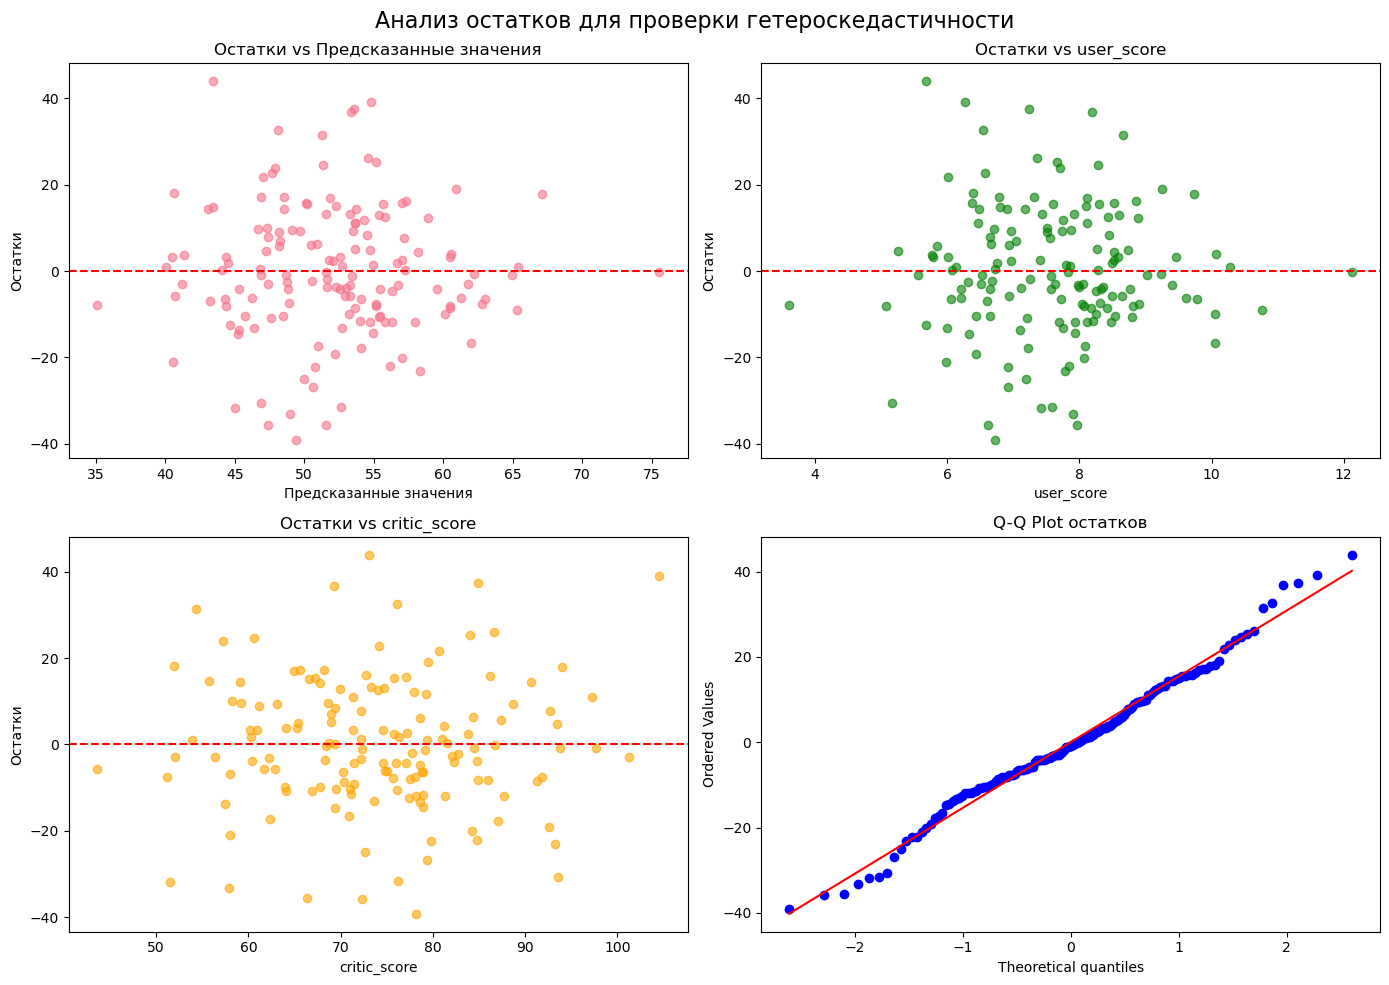

–í–∏–∑—É–∞–ª—å–Ω–∞—è –æ—Ü–µ–Ω–∫–∞:
- –ï—Å–ª–∏ –æ—Å—Ç–∞—Ç–∫–∏ —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã –≤–æ–∫—Ä—É–≥ –Ω—É–ª—è –±–µ–∑ –≤–∏–¥–∏–º—ã—Ö –ø–∞—Ç—Ç–µ—Ä–Ω–æ–≤,
  —Ç–æ –≥–æ–º–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å —Å–æ–±–ª—é–¥–∞–µ—Ç—Å—è
- –ï—Å–ª–∏ –≤–∏–¥–Ω–∞ –≤–æ—Ä–æ–Ω–∫–æ–æ–±—Ä–∞–∑–Ω–∞—è –∏–ª–∏ –∫–æ–Ω—É—Å–æ–æ–±—Ä–∞–∑–Ω–∞—è —Ñ–æ—Ä–º–∞,
  —Ç–æ –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É–µ—Ç –≥–µ—Ç–µ—Ä–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å

6.2. –¢–µ—Å—Ç –ë—Ä–æ–π—à–∞-–ü–∞–≥–∞–Ω–∞:
–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ LM: 3.9727
P-value: 0.1372
F-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: 1.9996
F p-value: 0.1391

–ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è —Ç–µ—Å—Ç–∞ –ë—Ä–æ–π—à–∞-–ü–∞–≥–∞–Ω–∞:
p-value >= 0.05: –ù–µ –æ—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É
–ì–µ—Ç–µ—Ä–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∞ (–≥–æ–º–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å)


In [40]:
## 6. –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –≥–µ—Ç–µ—Ä–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å

print(f"\n{'='*60}")
print("6. –ü–†–û–í–ï–†–ö–ê –ù–ê –ì–ï–¢–ï–†–û–°–ö–ï–î–ê–°–¢–ò–ß–ù–û–°–¢–¨")
print(f"{'='*60}")

print(f"6.1. –ì—Ä–∞—Ñ–∏—á–µ—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑ –æ—Å—Ç–∞—Ç–∫–æ–≤:")

# –ü–æ–ª—É—á–∞–µ–º –æ—Å—Ç–∞—Ç–∫–∏ –º–æ–¥–µ–ª–∏
residuals = model2.resid
fitted_values = model2.fittedvalues

# –°–æ–∑–¥–∞–µ–º –≥—Ä–∞—Ñ–∏–∫–∏ –æ—Å—Ç–∞—Ç–∫–æ–≤
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('–ê–Ω–∞–ª–∏–∑ –æ—Å—Ç–∞—Ç–∫–æ–≤ –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –≥–µ—Ç–µ—Ä–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç–∏', fontsize=16)

# –û—Å—Ç–∞—Ç–∫–∏ vs –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
axes[0, 0].scatter(fitted_values, residuals, alpha=0.6)
axes[0, 0].axhline(y=0, color='red', linestyle='--')
axes[0, 0].set_xlabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')
axes[0, 0].set_ylabel('–û—Å—Ç–∞—Ç–∫–∏')
axes[0, 0].set_title('–û—Å—Ç–∞—Ç–∫–∏ vs –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')

# –û—Å—Ç–∞—Ç–∫–∏ vs –ø–µ—Ä–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è
axes[0, 1].scatter(df[strongest_predictor], residuals, alpha=0.6, color='green')
axes[0, 1].axhline(y=0, color='red', linestyle='--')
axes[0, 1].set_xlabel(strongest_predictor)
axes[0, 1].set_ylabel('–û—Å—Ç–∞—Ç–∫–∏')
axes[0, 1].set_title(f'–û—Å—Ç–∞—Ç–∫–∏ vs {strongest_predictor}')

# –û—Å—Ç–∞—Ç–∫–∏ vs –≤—Ç–æ—Ä–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è
axes[1, 0].scatter(df[second_predictor], residuals, alpha=0.6, color='orange')
axes[1, 0].axhline(y=0, color='red', linestyle='--')
axes[1, 0].set_xlabel(second_predictor)
axes[1, 0].set_ylabel('–û—Å—Ç–∞—Ç–∫–∏')
axes[1, 0].set_title(f'–û—Å—Ç–∞—Ç–∫–∏ vs {second_predictor}')

# Q-Q plot –¥–ª—è –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ –æ—Å—Ç–∞—Ç–∫–æ–≤
stats.probplot(residuals, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot –æ—Å—Ç–∞—Ç–∫–æ–≤')

plt.tight_layout()
plt.show()

print(f"–í–∏–∑—É–∞–ª—å–Ω–∞—è –æ—Ü–µ–Ω–∫–∞:")
print("- –ï—Å–ª–∏ –æ—Å—Ç–∞—Ç–∫–∏ —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã –≤–æ–∫—Ä—É–≥ –Ω—É–ª—è –±–µ–∑ –≤–∏–¥–∏–º—ã—Ö –ø–∞—Ç—Ç–µ—Ä–Ω–æ–≤,")
print("  —Ç–æ –≥–æ–º–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å —Å–æ–±–ª—é–¥–∞–µ—Ç—Å—è")
print("- –ï—Å–ª–∏ –≤–∏–¥–Ω–∞ –≤–æ—Ä–æ–Ω–∫–æ–æ–±—Ä–∞–∑–Ω–∞—è –∏–ª–∏ –∫–æ–Ω—É—Å–æ–æ–±—Ä–∞–∑–Ω–∞—è —Ñ–æ—Ä–º–∞,")
print("  —Ç–æ –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É–µ—Ç –≥–µ—Ç–µ—Ä–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å")

print(f"\n6.2. –¢–µ—Å—Ç –ë—Ä–æ–π—à–∞-–ü–∞–≥–∞–Ω–∞:")

# –¢–µ—Å—Ç –ë—Ä–æ–π—à–∞-–ü–∞–≥–∞–Ω–∞
bp_test_stat, bp_p_value, bp_f_stat, bp_f_p_value = het_breuschpagan(residuals, X2_sm)

print(f"–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ LM: {bp_test_stat:.4f}")
print(f"P-value: {bp_p_value:.4f}")
print(f"F-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: {bp_f_stat:.4f}")
print(f"F p-value: {bp_f_p_value:.4f}")

print(f"\n–ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è —Ç–µ—Å—Ç–∞ –ë—Ä–æ–π—à–∞-–ü–∞–≥–∞–Ω–∞:")
if bp_p_value < 0.05:
    print("p-value < 0.05: –û—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É")
    print("–û–±–Ω–∞—Ä—É–∂–µ–Ω–∞ –≥–µ—Ç–µ—Ä–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å")
else:
    print("p-value >= 0.05: –ù–µ –æ—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É")
    print("–ì–µ—Ç–µ—Ä–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å –Ω–µ –æ–±–Ω–∞—Ä—É–∂–µ–Ω–∞ (–≥–æ–º–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å)")


7. –°–†–ê–í–ù–ï–ù–ò–ï –ú–û–î–ï–õ–ï–ô
7.1. –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏:
R¬≤ –ø–∞—Ä–Ω–æ–π –º–æ–¥–µ–ª–∏: 0.1030
R¬≤ –º–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏: 0.1395
–£–ª—É—á—à–µ–Ω–∏–µ: 0.0365

–°–∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–π R¬≤:
Adj R¬≤ –ø–∞—Ä–Ω–æ–π –º–æ–¥–µ–ª–∏: 0.0969
Adj R¬≤ –º–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏: 0.1278
–£–ª—É—á—à–µ–Ω–∏–µ: 0.0308

7.2. ANOVA-—Ç–µ—Å—Ç –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π:
–ì–∏–ø–æ—Ç–µ–∑—ã:
H‚ÇÄ: –î–æ–±–∞–≤–ª–µ–Ω–∏–µ critic_score –Ω–µ —É–ª—É—á—à–∞–µ—Ç –º–æ–¥–µ–ª—å
H‚ÇÅ: –î–æ–±–∞–≤–ª–µ–Ω–∏–µ critic_score —É–ª—É—á—à–∞–µ—Ç –º–æ–¥–µ–ª—å

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã F-—Ç–µ—Å—Ç–∞:
F-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: 6.2323
F –∫—Ä–∏—Ç–∏—á–µ—Å–∫–æ–µ (Œ±=0.05): 3.9055
P-value: 0.0136
–°—Ç–µ–ø–µ–Ω–∏ —Å–≤–æ–±–æ–¥—ã: df1=1, df2=147

–ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è F-—Ç–µ—Å—Ç–∞:
‚úÖ p-value < 0.05: –û—Ç–≤–µ—Ä–≥–∞–µ–º H‚ÇÄ
   –ú–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω–∞—è –º–æ–¥–µ–ª—å —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–æ –ª—É—á—à–µ –ø–∞—Ä–Ω–æ–π
   –î–æ–±

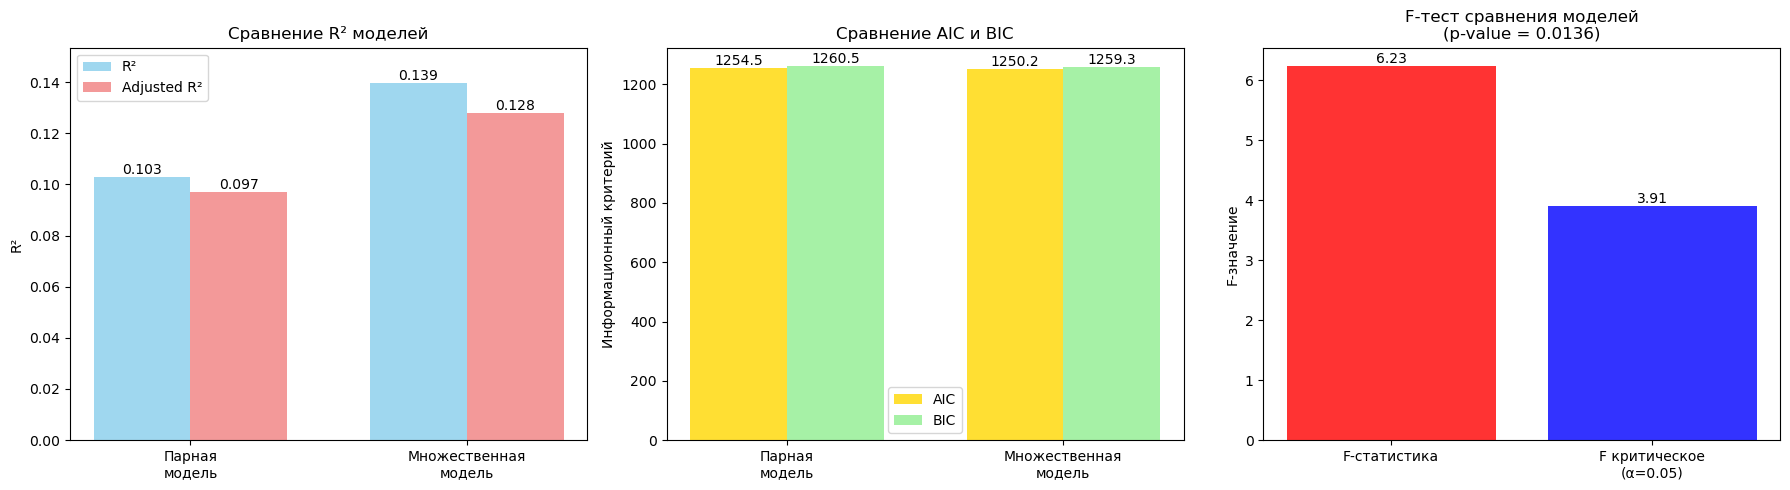


7.5. –û–∫–æ–Ω—á–∞—Ç–µ–ª—å–Ω–∞—è —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏—è –ø–æ –≤—ã–±–æ—Ä—É –º–æ–¥–µ–ª–∏:
–ê–Ω–∞–ª–∏–∑ –∫—Ä–∏—Ç–µ—Ä–∏–µ–≤:
‚Ä¢ R¬≤: –º–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω–∞—è –º–æ–¥–µ–ª—å –ª—É—á—à–µ (0.1395 vs 0.1030)
‚Ä¢ Adjusted R¬≤: –º–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω–∞—è –º–æ–¥–µ–ª—å –ª—É—á—à–µ (0.1278 vs 0.0969)
‚Ä¢ F-—Ç–µ—Å—Ç: –º–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω–∞—è –º–æ–¥–µ–ª—å –ª—É—á—à–µ (p-value = 0.0136)
‚Ä¢ AIC: –º–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω–∞—è –º–æ–¥–µ–ª—å –ª—É—á—à–µ (1250.23 vs 1254.46)

üèÜ –ò–¢–û–ì–û–í–û–ï –†–ï–®–ï–ù–ò–ï:
–†–µ–∫–æ–º–µ–Ω–¥—É–µ—Ç—Å—è –ú–ù–û–ñ–ï–°–¢–í–ï–ù–ù–ê–Ø –º–æ–¥–µ–ª—å (4 –∏–∑ 4 –∫—Ä–∏—Ç–µ—Ä–∏–µ–≤)

–û–±–æ—Å–Ω–æ–≤–∞–Ω–∏–µ:
- –ú–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω–∞—è –º–æ–¥–µ–ª—å –æ–±—ä—è—Å–Ω—è–µ—Ç –±–æ–ª—å—à–µ –≤–∞—Ä–∏–∞—Ü–∏–∏ –≤ –¥–∞–Ω–Ω—ã—Ö
- –°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–µ –∫—Ä–∏—Ç–µ—Ä–∏–∏ –ø–æ–¥–¥–µ—Ä–∂–∏–≤–∞—é—Ç –≤–∫–ª—é—á–µ–Ω–∏–µ critic_score
- –£–ª—É—á—à–µ–Ω–∏–µ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–æ


In [46]:
## 7. –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π

print(f"\n{'='*60}")
print("7. –°–†–ê–í–ù–ï–ù–ò–ï –ú–û–î–ï–õ–ï–ô")
print(f"{'='*60}")

print(f"7.1. –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏:")
print(f"R¬≤ –ø–∞—Ä–Ω–æ–π –º–æ–¥–µ–ª–∏: {r_squared:.4f}")
print(f"R¬≤ –º–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏: {r_squared2:.4f}")
print(f"–£–ª—É—á—à–µ–Ω–∏–µ: {r_squared2 - r_squared:.4f}")

# –°–∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–π R¬≤
adj_r2_model1 = model1.rsquared_adj
adj_r2_model2 = model2.rsquared_adj

print(f"\n–°–∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–π R¬≤:")
print(f"Adj R¬≤ –ø–∞—Ä–Ω–æ–π –º–æ–¥–µ–ª–∏: {adj_r2_model1:.4f}")
print(f"Adj R¬≤ –º–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏: {adj_r2_model2:.4f}")
print(f"–£–ª—É—á—à–µ–Ω–∏–µ: {adj_r2_model2 - adj_r2_model1:.4f}")

print(f"\n7.2. ANOVA-—Ç–µ—Å—Ç –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π:")

# F-—Ç–µ—Å—Ç –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –≤–ª–æ–∂–µ–Ω–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π
ssr_model1 = np.sum((y - model1.fittedvalues)**2)  # –°—É–º–º–∞ –∫–≤–∞–¥—Ä–∞—Ç–æ–≤ –æ—Å—Ç–∞—Ç–∫–æ–≤ –º–æ–¥–µ–ª—å 1
ssr_model2 = np.sum((y - model2.fittedvalues)**2)  # –°—É–º–º–∞ –∫–≤–∞–¥—Ä–∞—Ç–æ–≤ –æ—Å—Ç–∞—Ç–∫–æ–≤ –º–æ–¥–µ–ª—å 2

# –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
k1 = 2  # intercept + 1 –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è
k2 = 3  # intercept + 2 –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ
n = len(y)  # –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π

# F-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π
# H0: –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è –Ω–µ —É–ª—É—á—à–∞–µ—Ç –º–æ–¥–µ–ª—å
# H1: –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è —É–ª—É—á—à–∞–µ—Ç –º–æ–¥–µ–ª—å
f_stat = ((ssr_model1 - ssr_model2) / (k2 - k1)) / (ssr_model2 / (n - k2))
f_critical = stats.f.ppf(0.95, k2 - k1, n - k2)
f_p_value = 1 - stats.f.cdf(f_stat, k2 - k1, n - k2)

print(f"–ì–∏–ø–æ—Ç–µ–∑—ã:")
print(f"H‚ÇÄ: –î–æ–±–∞–≤–ª–µ–Ω–∏–µ {second_predictor} –Ω–µ —É–ª—É—á—à–∞–µ—Ç –º–æ–¥–µ–ª—å")
print(f"H‚ÇÅ: –î–æ–±–∞–≤–ª–µ–Ω–∏–µ {second_predictor} —É–ª—É—á—à–∞–µ—Ç –º–æ–¥–µ–ª—å")

print(f"\n–†–µ–∑—É–ª—å—Ç–∞—Ç—ã F-—Ç–µ—Å—Ç–∞:")
print(f"F-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞: {f_stat:.4f}")
print(f"F –∫—Ä–∏—Ç–∏—á–µ—Å–∫–æ–µ (Œ±=0.05): {f_critical:.4f}")
print(f"P-value: {f_p_value:.4f}")
print(f"–°—Ç–µ–ø–µ–Ω–∏ —Å–≤–æ–±–æ–¥—ã: df1={k2-k1}, df2={n-k2}")

print(f"\n–ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è F-—Ç–µ—Å—Ç–∞:")
if f_p_value < 0.05:
    print("‚úÖ p-value < 0.05: –û—Ç–≤–µ—Ä–≥–∞–µ–º H‚ÇÄ")
    print("   –ú–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω–∞—è –º–æ–¥–µ–ª—å —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–æ –ª—É—á—à–µ –ø–∞—Ä–Ω–æ–π")
    print(f"   –î–æ–±–∞–≤–ª–µ–Ω–∏–µ {second_predictor} –∑–Ω–∞—á–∏–º–æ —É–ª—É—á—à–∞–µ—Ç –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç–µ–ª—å–Ω—É—é —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å")
    preferred_model = "–º–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω–∞—è"
else:
    print("‚ùå p-value >= 0.05: –ù–µ –æ—Ç–≤–µ—Ä–≥–∞–µ–º H‚ÇÄ")
    print("   –†–∞–∑–ª–∏—á–∏–µ –º–µ–∂–¥—É –º–æ–¥–µ–ª—è–º–∏ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –Ω–µ –∑–Ω–∞—á–∏–º–æ")
    print(f"   –î–æ–±–∞–≤–ª–µ–Ω–∏–µ {second_predictor} –Ω–µ –¥–∞–µ—Ç –∑–Ω–∞—á–∏–º–æ–≥–æ —É–ª—É—á—à–µ–Ω–∏—è")
    preferred_model = "–ø–∞—Ä–Ω–∞—è (–±–æ–ª–µ–µ –ø—Ä–æ—Å—Ç–∞—è)"

print(f"\n7.3. –ò—Ç–æ–≥–æ–≤–æ–µ —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π:")

# –°–æ–∑–¥–∞–µ–º –ø–æ–¥—Ä–æ–±–Ω—É—é —Ç–∞–±–ª–∏—Ü—É —Å—Ä–∞–≤–Ω–µ–Ω–∏—è
comparison_data = {
    '–ú–µ—Ç—Ä–∏–∫–∞': ['R¬≤', 'Adjusted R¬≤', 'AIC', 'BIC', 'F-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –º–æ–¥–µ–ª–∏', 'P-value –º–æ–¥–µ–ª–∏', '–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤'],
    '–ü–∞—Ä–Ω–∞—è –º–æ–¥–µ–ª—å': [
        f"{r_squared:.4f}",
        f"{adj_r2_model1:.4f}",
        f"{model1.aic:.2f}",
        f"{model1.bic:.2f}",
        f"{model1.fvalue:.2f}",
        f"{model1.f_pvalue:.4f}",
        k1-1  # –∏—Å–∫–ª—é—á–∞–µ–º –∫–æ–Ω—Å—Ç–∞–Ω—Ç—É
    ],
    '–ú–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω–∞—è –º–æ–¥–µ–ª—å': [
        f"{r_squared2:.4f}",
        f"{adj_r2_model2:.4f}",
        f"{model2.aic:.2f}",
        f"{model2.bic:.2f}",
        f"{model2.fvalue:.2f}",
        f"{model2.f_pvalue:.4f}",
        k2-1  # –∏—Å–∫–ª—é—á–∞–µ–º –∫–æ–Ω—Å—Ç–∞–Ω—Ç—É
    ],
    '–ò–∑–º–µ–Ω–µ–Ω–∏–µ': [
        f"+{r_squared2 - r_squared:.4f}",
        f"+{adj_r2_model2 - adj_r2_model1:.4f}",
        f"{model2.aic - model1.aic:+.2f}",
        f"{model2.bic - model1.bic:+.2f}",
        "–°—Ä–∞–≤–Ω–µ–Ω–∏–µ F-—Ç–µ—Å—Ç–æ–º",
        f"F-test: {f_p_value:.4f}",
        "+1 –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è"
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

print(f"\n7.4. –ö—Ä–∏—Ç–µ—Ä–∏–∏ –≤—ã–±–æ—Ä–∞ –º–æ–¥–µ–ª–∏:")
print(f"üìä R¬≤ –∏ Adjusted R¬≤: –ß–µ–º –≤—ã—à–µ, —Ç–µ–º –ª—É—á—à–µ")
print(f"üìä AIC –∏ BIC: –ß–µ–º –Ω–∏–∂–µ, —Ç–µ–º –ª—É—á—à–µ (—É—á–∏—Ç—ã–≤–∞—é—Ç —Å–ª–æ–∂–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏)")
print(f"üìä F-—Ç–µ—Å—Ç: –ü—Ä–æ–≤–µ—Ä—è–µ—Ç –∑–Ω–∞—á–∏–º–æ—Å—Ç—å —É–ª—É—á—à–µ–Ω–∏—è –ø—Ä–∏ –¥–æ–±–∞–≤–ª–µ–Ω–∏–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö")

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. –°—Ä–∞–≤–Ω–µ–Ω–∏–µ R¬≤
model_names = ['–ü–∞—Ä–Ω–∞—è\n–º–æ–¥–µ–ª—å', '–ú–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω–∞—è\n–º–æ–¥–µ–ª—å']
r_squared_values = [r_squared, r_squared2]
adj_r_squared_values = [adj_r2_model1, adj_r2_model2]

x_pos = np.arange(len(model_names))
width = 0.35

bars1 = axes[0].bar(x_pos - width/2, r_squared_values, width, label='R¬≤', color='skyblue', alpha=0.8)
bars2 = axes[0].bar(x_pos + width/2, adj_r_squared_values, width, label='Adjusted R¬≤', color='lightcoral', alpha=0.8)

axes[0].set_ylabel('R¬≤')
axes[0].set_title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ R¬≤ –º–æ–¥–µ–ª–µ–π')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(model_names)
axes[0].legend()
axes[0].set_ylim(0, max(max(r_squared_values), max(adj_r_squared_values)) * 1.1)

# –î–æ–±–∞–≤–ª—è–µ–º –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ —Å—Ç–æ–ª–±—Ü—ã
for bars, values in [(bars1, r_squared_values), (bars2, adj_r_squared_values)]:
    for bar, value in zip(bars, values):
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height,
                    f'{value:.3f}', ha='center', va='bottom')

# 2. –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã—Ö –∫—Ä–∏—Ç–µ—Ä–∏–µ–≤
aic_values = [model1.aic, model2.aic]
bic_values = [model1.bic, model2.bic]

bars3 = axes[1].bar(x_pos - width/2, aic_values, width, label='AIC', color='gold', alpha=0.8)
bars4 = axes[1].bar(x_pos + width/2, bic_values, width, label='BIC', color='lightgreen', alpha=0.8)

axes[1].set_ylabel('–ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã–π –∫—Ä–∏—Ç–µ—Ä–∏–π')
axes[1].set_title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ AIC –∏ BIC')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(model_names)
axes[1].legend()

# –î–æ–±–∞–≤–ª—è–µ–º –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ —Å—Ç–æ–ª–±—Ü—ã
for bars, values in [(bars3, aic_values), (bars4, bic_values)]:
    for bar, value in zip(bars, values):
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{value:.1f}', ha='center', va='bottom')

# 3. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è F-—Ç–µ—Å—Ç–∞
categories = ['F-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞', 'F –∫—Ä–∏—Ç–∏—á–µ—Å–∫–æ–µ\n(Œ±=0.05)']
f_values = [f_stat, f_critical]
colors = ['red' if f_stat > f_critical else 'orange', 'blue']

bars5 = axes[2].bar(categories, f_values, color=colors, alpha=0.8)
axes[2].set_ylabel('F-–∑–Ω–∞—á–µ–Ω–∏–µ')
axes[2].set_title(f'F-—Ç–µ—Å—Ç —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π\n(p-value = {f_p_value:.4f})')

# –î–æ–±–∞–≤–ª—è–µ–º –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ —Å—Ç–æ–ª–±—Ü—ã
for bar, value in zip(bars5, f_values):
    height = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width()/2., height,
                f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"\n7.5. –û–∫–æ–Ω—á–∞—Ç–µ–ª—å–Ω–∞—è —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏—è –ø–æ –≤—ã–±–æ—Ä—É –º–æ–¥–µ–ª–∏:")

# –ü—Ä–∏–Ω—è—Ç–∏–µ —Ä–µ—à–µ–Ω–∏—è –Ω–∞ –æ—Å–Ω–æ–≤–µ –≤—Å–µ—Ö –∫—Ä–∏—Ç–µ—Ä–∏–µ–≤
decision_factors = []

# –ö—Ä–∏—Ç–µ—Ä–∏–π 1: R¬≤
if r_squared2 > r_squared:
    decision_factors.append("R¬≤ —É–ª—É—á—à–∏–ª—Å—è")
    r2_preference = "–º–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω–∞—è"
else:
    decision_factors.append("R¬≤ –Ω–µ —É–ª—É—á—à–∏–ª—Å—è")
    r2_preference = "–ø–∞—Ä–Ω–∞—è"

# –ö—Ä–∏—Ç–µ—Ä–∏–π 2: Adjusted R¬≤
if adj_r2_model2 > adj_r2_model1:
    decision_factors.append("Adjusted R¬≤ —É–ª—É—á—à–∏–ª—Å—è")
    adj_r2_preference = "–º–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω–∞—è"
else:
    decision_factors.append("Adjusted R¬≤ –Ω–µ —É–ª—É—á—à–∏–ª—Å—è")
    adj_r2_preference = "–ø–∞—Ä–Ω–∞—è"

# –ö—Ä–∏—Ç–µ—Ä–∏–π 3: F-—Ç–µ—Å—Ç
if f_p_value < 0.05:
    decision_factors.append("F-—Ç–µ—Å—Ç –∑–Ω–∞—á–∏–º")
    f_test_preference = "–º–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω–∞—è"
else:
    decision_factors.append("F-—Ç–µ—Å—Ç –Ω–µ –∑–Ω–∞—á–∏–º")
    f_test_preference = "–ø–∞—Ä–Ω–∞—è"

# –ö—Ä–∏—Ç–µ—Ä–∏–π 4: AIC (–º–µ–Ω—å—à–µ - –ª—É—á—à–µ)
if model2.aic < model1.aic:
    decision_factors.append("AIC –º–µ–Ω—å—à–µ")
    aic_preference = "–º–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω–∞—è"
else:
    decision_factors.append("AIC –±–æ–ª—å—à–µ")
    aic_preference = "–ø–∞—Ä–Ω–∞—è"

print("–ê–Ω–∞–ª–∏–∑ –∫—Ä–∏—Ç–µ—Ä–∏–µ–≤:")
print(f"‚Ä¢ R¬≤: {r2_preference} –º–æ–¥–µ–ª—å –ª—É—á—à–µ ({r_squared2:.4f} vs {r_squared:.4f})")
print(f"‚Ä¢ Adjusted R¬≤: {adj_r2_preference} –º–æ–¥–µ–ª—å –ª—É—á—à–µ ({adj_r2_model2:.4f} vs {adj_r2_model1:.4f})")
print(f"‚Ä¢ F-—Ç–µ—Å—Ç: {f_test_preference} –º–æ–¥–µ–ª—å –ª—É—á—à–µ (p-value = {f_p_value:.4f})")
print(f"‚Ä¢ AIC: {aic_preference} –º–æ–¥–µ–ª—å –ª—É—á—à–µ ({model2.aic:.2f} vs {model1.aic:.2f})")

# –ü–æ–¥—Å—á–µ—Ç "–≥–æ–ª–æ—Å–æ–≤" –∑–∞ –∫–∞–∂–¥—É—é –º–æ–¥–µ–ª—å
votes_multiple = [r2_preference, adj_r2_preference, f_test_preference, aic_preference].count("–º–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω–∞—è")
votes_simple = [r2_preference, adj_r2_preference, f_test_preference, aic_preference].count("–ø–∞—Ä–Ω–∞—è")

print(f"\nüèÜ –ò–¢–û–ì–û–í–û–ï –†–ï–®–ï–ù–ò–ï:")
if votes_multiple > votes_simple:
    final_recommendation = "–º–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω–∞—è"
    print(f"–†–µ–∫–æ–º–µ–Ω–¥—É–µ—Ç—Å—è –ú–ù–û–ñ–ï–°–¢–í–ï–ù–ù–ê–Ø –º–æ–¥–µ–ª—å ({votes_multiple} –∏–∑ 4 –∫—Ä–∏—Ç–µ—Ä–∏–µ–≤)")
else:
    final_recommendation = "–ø–∞—Ä–Ω–∞—è"
    print(f"–†–µ–∫–æ–º–µ–Ω–¥—É–µ—Ç—Å—è –ü–ê–†–ù–ê–Ø –º–æ–¥–µ–ª—å ({votes_simple} –∏–∑ 4 –∫—Ä–∏—Ç–µ—Ä–∏–µ–≤)")

print(f"\n–û–±–æ—Å–Ω–æ–≤–∞–Ω–∏–µ:")
if final_recommendation == "–º–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω–∞—è":
    print(f"- –ú–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω–∞—è –º–æ–¥–µ–ª—å –æ–±—ä—è—Å–Ω—è–µ—Ç –±–æ–ª—å—à–µ –≤–∞—Ä–∏–∞—Ü–∏–∏ –≤ –¥–∞–Ω–Ω—ã—Ö")
    print(f"- –°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–µ –∫—Ä–∏—Ç–µ—Ä–∏–∏ –ø–æ–¥–¥–µ—Ä–∂–∏–≤–∞—é—Ç –≤–∫–ª—é—á–µ–Ω–∏–µ {second_predictor}")
    print(f"- –£–ª—É—á—à–µ–Ω–∏–µ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º–æ")
else:
    print(f"- –ü–∞—Ä–Ω–∞—è –º–æ–¥–µ–ª—å –ø—Ä–æ—â–µ –∏ –Ω–µ —É—Å—Ç—É–ø–∞–µ—Ç –ø–æ –∫–∞—á–µ—Å—Ç–≤—É")
    print(f"- –ü—Ä–∏–Ω—Ü–∏–ø –ø–∞—Ä—Å–∏–º–æ–Ω–∏–∏: –ø—Ä–æ—Å—Ç–∞—è –º–æ–¥–µ–ª—å –ø—Ä–µ–¥–ø–æ—á—Ç–∏—Ç–µ–ª—å–Ω–µ–µ –ø—Ä–∏ —Å—Ö–æ–∂–µ–º –∫–∞—á–µ—Å—Ç–≤–µ")
    print(f"- –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è –Ω–µ –¥–∞–µ—Ç –∑–Ω–∞—á–∏–º–æ–≥–æ —É–ª—É—á—à–µ–Ω–∏—è")


8. –û–ö–û–ù–ß–ê–¢–ï–õ–¨–ù–´–ï –í–´–í–û–î–´
8.1. –û—Ç–≤–µ—Ç –Ω–∞ –∏—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –≤–æ–ø—Ä–æ—Å:
–ò—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –≤–æ–ø—Ä–æ—Å: '–ö–∞–∫–∏–µ —Ñ–∞–∫—Ç–æ—Ä—ã –∏–∑ –∏–º–µ—é—â–∏—Ö—Å—è –≤ –¥–∞–Ω–Ω—ã—Ö —Å–≤—è–∑–∞–Ω—ã
—Å –æ–±—ä–µ–º–æ–º –ø—Ä–æ–¥–∞–∂ –≤–∏–¥–µ–æ–∏–≥—Ä –∏ –∫–∞–∫ –∏–º–µ–Ω–Ω–æ?'

–û—Ç–≤–µ—Ç:
–ù–∞ –æ—Å–Ω–æ–≤–µ –ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–≥–æ —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å —Å–ª–µ–¥—É—é—â–∏–µ –≤—ã–≤–æ–¥—ã:

1. –ù–∞–∏–±–æ–ª–µ–µ –≤–∞–∂–Ω—ã–µ —Ñ–∞–∫—Ç–æ—Ä—ã, –≤–ª–∏—è—é—â–∏–µ –Ω–∞ –ø—Ä–æ–¥–∞–∂–∏:
   - user_score: –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ 0.321
   - critic_score: –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ 0.183

2. –•–∞—Ä–∞–∫—Ç–µ—Ä –≤–ª–∏—è–Ω–∏—è:
   - user_score –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ –≤–ª–∏—è–µ—Ç –Ω–∞ –ø—Ä–æ–¥–∞–∂–∏
     (—É–≤–µ–ª–∏—á–µ–Ω–∏–µ –Ω–∞ 1 –µ–¥–∏–Ω–∏—Ü—É –ø—Ä–∏–≤–æ–¥–∏—Ç –∫ –∏–∑–º–µ–Ω–µ–Ω–∏—é –ø—Ä–æ–¥–∞–∂ –Ω–∞ 4.396 –º–ª–Ω –∫–æ–ø–∏–π)
   - critic_score –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ –≤–ª–∏—è–µ—Ç –

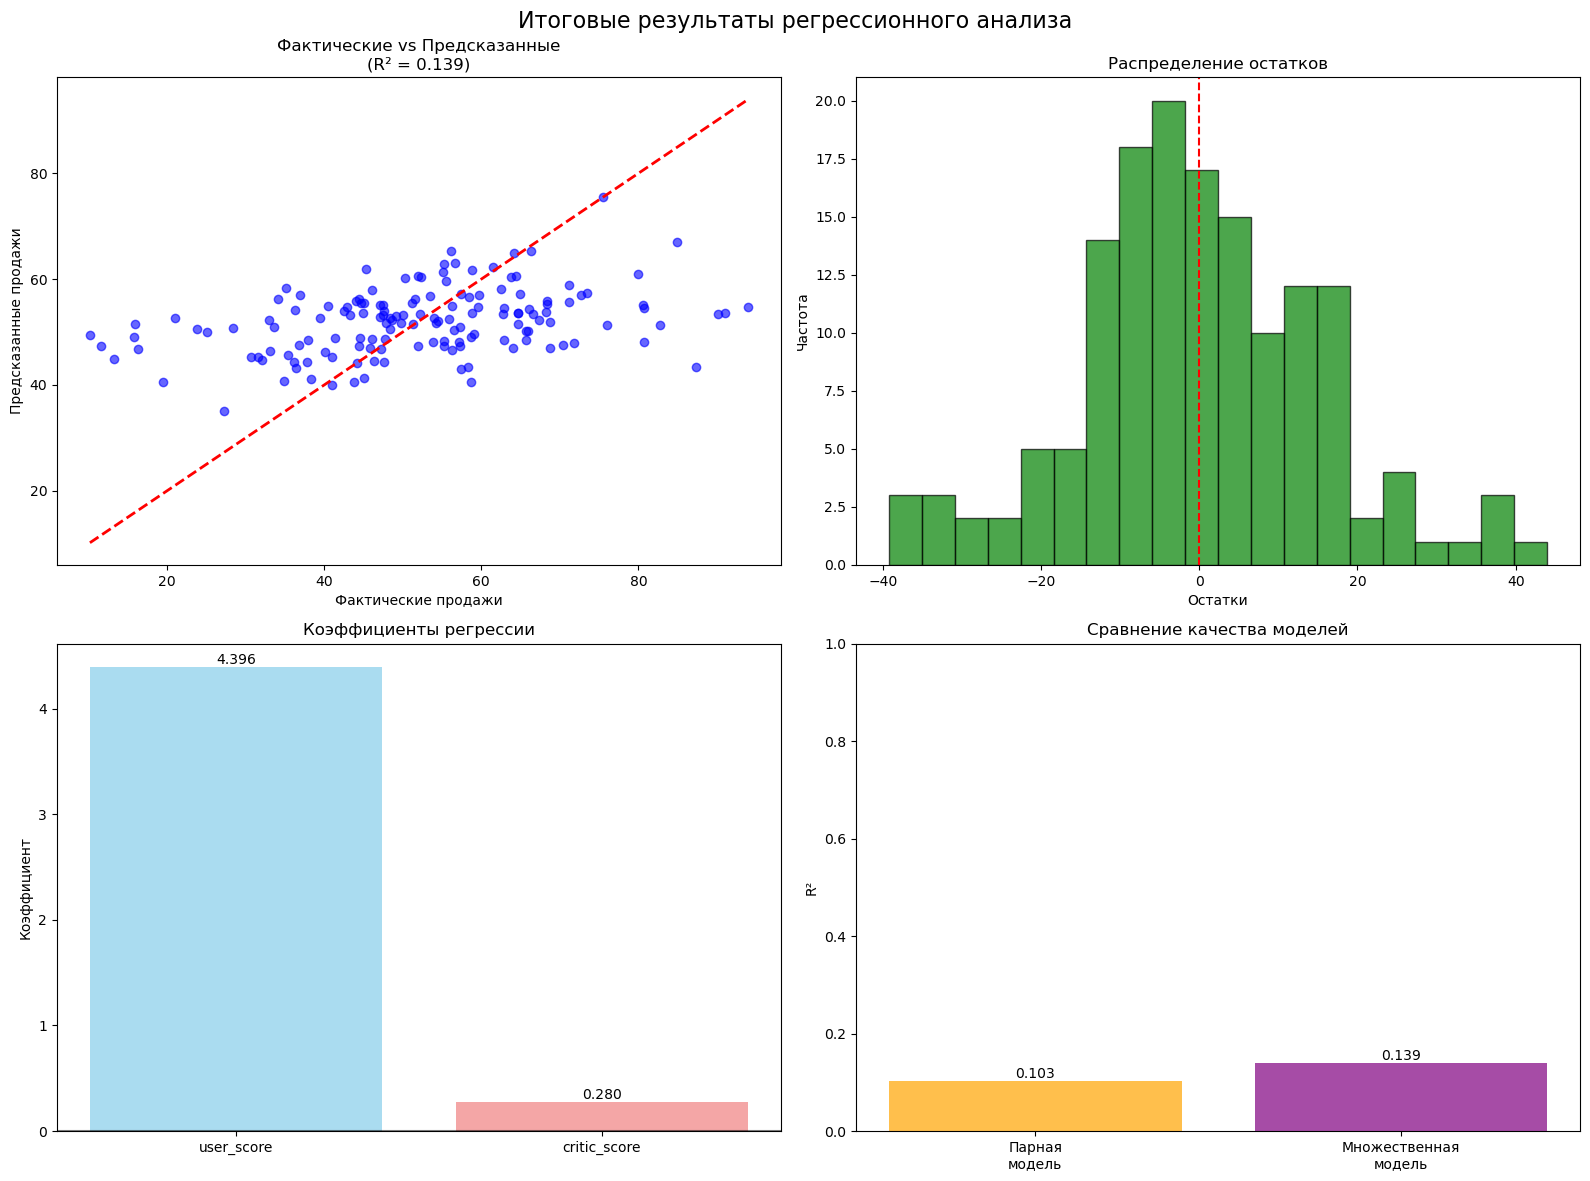


10. –¢–ï–•–ù–ò–ß–ï–°–ö–ê–Ø –ò–ù–§–û–†–ú–ê–¶–ò–Ø
–ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–Ω—ã–µ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏:
- pandas: –æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö
- numpy: –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏–µ –æ–ø–µ—Ä–∞—Ü–∏–∏
- matplotlib, seaborn: –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
- scipy: —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–µ —Ç–µ—Å—Ç—ã
- statsmodels: —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑
- sklearn: –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –º–µ—Ç—Ä–∏–∫–∏

–ü–∞—Ä–∞–º–µ—Ç—Ä—ã –∞–Ω–∞–ª–∏–∑–∞:
- –†–∞–∑–º–µ—Ä –≤—ã–±–æ—Ä–∫–∏: 150 –Ω–∞–±–ª—é–¥–µ–Ω–∏–π
- –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä–æ–≤ –≤ –∏—Ç–æ–≥–æ–≤–æ–π –º–æ–¥–µ–ª–∏: 2
- –£—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏: Œ± = 0.05

–î–∞—Ç–∞ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è: 2025-08-30 10:31:28



In [50]:
## 8. –û–∫–æ–Ω—á–∞—Ç–µ–ª—å–Ω—ã–µ –≤—ã–≤–æ–¥—ã –∏ –æ—Ç–≤–µ—Ç –Ω–∞ –∏—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –≤–æ–ø—Ä–æ—Å

print(f"\n{'='*60}")
print("8. –û–ö–û–ù–ß–ê–¢–ï–õ–¨–ù–´–ï –í–´–í–û–î–´")
print(f"{'='*60}")

print(f"8.1. –û—Ç–≤–µ—Ç –Ω–∞ –∏—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –≤–æ–ø—Ä–æ—Å:")
print(f"–ò—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –≤–æ–ø—Ä–æ—Å: '–ö–∞–∫–∏–µ —Ñ–∞–∫—Ç–æ—Ä—ã –∏–∑ –∏–º–µ—é—â–∏—Ö—Å—è –≤ –¥–∞–Ω–Ω—ã—Ö —Å–≤—è–∑–∞–Ω—ã")
print(f"—Å –æ–±—ä–µ–º–æ–º –ø—Ä–æ–¥–∞–∂ –≤–∏–¥–µ–æ–∏–≥—Ä –∏ –∫–∞–∫ –∏–º–µ–Ω–Ω–æ?'")

print(f"\n–û—Ç–≤–µ—Ç:")
print(f"–ù–∞ –æ—Å–Ω–æ–≤–µ –ø—Ä–æ–≤–µ–¥–µ–Ω–Ω–æ–≥–æ —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å —Å–ª–µ–¥—É—é—â–∏–µ –≤—ã–≤–æ–¥—ã:")

print(f"\n1. –ù–∞–∏–±–æ–ª–µ–µ –≤–∞–∂–Ω—ã–µ —Ñ–∞–∫—Ç–æ—Ä—ã, –≤–ª–∏—è—é—â–∏–µ –Ω–∞ –ø—Ä–æ–¥–∞–∂–∏:")
print(f"   - {strongest_predictor}: –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ {target_correlations[strongest_predictor]:.3f}")
print(f"   - {second_predictor}: –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ {target_correlations[second_predictor]:.3f}")

print(f"\n2. –•–∞—Ä–∞–∫—Ç–µ—Ä –≤–ª–∏—è–Ω–∏—è:")
if coeff1_new > 0:
    direction1 = "–ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ –≤–ª–∏—è–µ—Ç"
else:
    direction1 = "–æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–æ –≤–ª–∏—è–µ—Ç"
    
if coeff2 > 0:
    direction2 = "–ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ –≤–ª–∏—è–µ—Ç"
else:
    direction2 = "–æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–æ –≤–ª–∏—è–µ—Ç"

print(f"   - {strongest_predictor} {direction1} –Ω–∞ –ø—Ä–æ–¥–∞–∂–∏")
print(f"     (—É–≤–µ–ª–∏—á–µ–Ω–∏–µ –Ω–∞ 1 –µ–¥–∏–Ω–∏—Ü—É –ø—Ä–∏–≤–æ–¥–∏—Ç –∫ –∏–∑–º–µ–Ω–µ–Ω–∏—é –ø—Ä–æ–¥–∞–∂ –Ω–∞ {coeff1_new:.3f} –º–ª–Ω –∫–æ–ø–∏–π)")
print(f"   - {second_predictor} {direction2} –Ω–∞ –ø—Ä–æ–¥–∞–∂–∏")
print(f"     (—É–≤–µ–ª–∏—á–µ–Ω–∏–µ –Ω–∞ 1 –µ–¥–∏–Ω–∏—Ü—É –ø—Ä–∏–≤–æ–¥–∏—Ç –∫ –∏–∑–º–µ–Ω–µ–Ω–∏—é –ø—Ä–æ–¥–∞–∂ –Ω–∞ {coeff2:.3f} –º–ª–Ω –∫–æ–ø–∏–π)")

print(f"\n3. –ö–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏:")
print(f"   - –ú–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω–∞—è –º–æ–¥–µ–ª—å –æ–±—ä—è—Å–Ω—è–µ—Ç {r_squared2*100:.1f}% –≤–∞—Ä–∏–∞—Ü–∏–∏ –≤ –ø—Ä–æ–¥–∞–∂–∞—Ö")
print(f"   - –û–±–∞ –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã")

print(f"\n4. –ü—Ä–æ–≤–µ—Ä–∫–∞ –ø—Ä–µ–¥–ø–æ—Å—ã–ª–æ–∫:")
if abs(correlation_predictors) < 0.7:
    multicollinearity_status = "–æ—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç"
else:
    multicollinearity_status = "–ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É–µ—Ç"
    
if bp_p_value >= 0.05:
    heteroscedasticity_status = "–æ—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç"
else:
    heteroscedasticity_status = "–ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É–µ—Ç"

print(f"   - –ú—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç—å: {multicollinearity_status}")
print(f"   - –ì–µ—Ç–µ—Ä–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å: {heteroscedasticity_status}")

print(f"\n8.2. –ü—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏:")
print(f"–î–ª—è –ø–æ–≤—ã—à–µ–Ω–∏—è –ø—Ä–æ–¥–∞–∂ –≤–∏–¥–µ–æ–∏–≥—Ä —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫–∞–º —Å–ª–µ–¥—É–µ—Ç:")

if strongest_predictor == 'critic_score':
    print(f"- –§–æ–∫—É—Å–∏—Ä–æ–≤–∞—Ç—å—Å—è –Ω–∞ –∫–∞—á–µ—Å—Ç–≤–µ –∏–≥—Ä—ã –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –≤—ã—Å–æ–∫–∏—Ö –æ—Ü–µ–Ω–æ–∫ –∫—Ä–∏—Ç–∏–∫–æ–≤")
elif strongest_predictor == 'user_score':
    print(f"- –£–¥–µ–ª—è—Ç—å –≤–Ω–∏–º–∞–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–æ–º—É –æ–ø—ã—Ç—É –∏ —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–µ–Ω–Ω–æ—Å—Ç–∏ –∏–≥—Ä–æ–∫–æ–≤")
elif strongest_predictor == 'marketing_budget':
    print(f"- –ò–Ω–≤–µ—Å—Ç–∏—Ä–æ–≤–∞—Ç—å –≤ –º–∞—Ä–∫–µ—Ç–∏–Ω–≥ –∏ –ø—Ä–æ–¥–≤–∏–∂–µ–Ω–∏–µ –∏–≥—Ä—ã")

if second_predictor == 'critic_score':
    print(f"- –¢–∞–∫–∂–µ –≤–∞–∂–Ω–æ –ø–æ–ª—É—á–∞—Ç—å –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ –æ—Ç–∑—ã–≤—ã –æ—Ç –∫—Ä–∏—Ç–∏–∫–æ–≤")
elif second_predictor == 'user_score':
    print(f"- –ó–∞–±–æ—Ç–∏—Ç—å—Å—è –æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–æ–º –æ–ø—ã—Ç–µ –∏ –æ—Ç–∑—ã–≤–∞—Ö –∏–≥—Ä–æ–∫–æ–≤")
elif second_predictor == 'marketing_budget':
    print(f"- –í—ã–¥–µ–ª—è—Ç—å –¥–æ—Å—Ç–∞—Ç–æ—á–Ω—ã–π –±—é–¥–∂–µ—Ç –Ω–∞ –º–∞—Ä–∫–µ—Ç–∏–Ω–≥")

print(f"\n8.3. –û–≥—Ä–∞–Ω–∏—á–µ–Ω–∏—è –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è:")
print(f"- –ú–æ–¥–µ–ª—å –æ—Å–Ω–æ–≤–∞–Ω–∞ –Ω–∞ —Å–∏–Ω—Ç–µ—Ç–∏—á–µ—Å–∫–∏—Ö –¥–∞–Ω–Ω—ã—Ö")
print(f"- –ù–µ —É—á—Ç–µ–Ω—ã –¥—Ä—É–≥–∏–µ –≤–∞–∂–Ω—ã–µ —Ñ–∞–∫—Ç–æ—Ä—ã (–∫–æ–Ω–∫—É—Ä–µ–Ω—Ü–∏—è, —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å, etc.)")
print(f"- –ú–æ–¥–µ–ª—å –æ–±—ä—è—Å–Ω—è–µ—Ç {r_squared2*100:.1f}% –≤–∞—Ä–∏–∞—Ü–∏–∏, –æ—Å—Ç–∞–ª—å–Ω–æ–µ —Å–≤—è–∑–∞–Ω–æ —Å –¥—Ä—É–≥–∏–º–∏ —Ñ–∞–∫—Ç–æ—Ä–∞–º–∏")
print(f"- –ü—Ä–∏—á–∏–Ω–Ω–æ-—Å–ª–µ–¥—Å—Ç–≤–µ–Ω–Ω—ã–µ —Å–≤—è–∑–∏ —Ç—Ä–µ–±—É—é—Ç –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è")

## 9. –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–∞—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤

print(f"\n{'='*60}")
print("9. –ò–¢–û–ì–û–í–ê–Ø –í–ò–ó–£–ê–õ–ò–ó–ê–¶–ò–Ø –†–ï–ó–£–õ–¨–¢–ê–¢–û–í")
print(f"{'='*60}")

# –°–æ–∑–¥–∞–µ–º –∏—Ç–æ–≥–æ–≤—É—é –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—é
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('–ò—Ç–æ–≥–æ–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞', fontsize=16)

# 1. –°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏—Ö –∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
axes[0, 0].scatter(y, model2.fittedvalues, alpha=0.6, color='blue')
axes[0, 0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –ø—Ä–æ–¥–∞–∂–∏')
axes[0, 0].set_ylabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –ø—Ä–æ–¥–∞–∂–∏')
axes[0, 0].set_title(f'–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ vs –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ\n(R¬≤ = {r_squared2:.3f})')

# 2. –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Å—Ç–∞—Ç–∫–æ–≤
axes[0, 1].hist(residuals, bins=20, alpha=0.7, color='green', edgecolor='black')
axes[0, 1].set_xlabel('–û—Å—Ç–∞—Ç–∫–∏')
axes[0, 1].set_ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
axes[0, 1].set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Å—Ç–∞—Ç–∫–æ–≤')
axes[0, 1].axvline(x=0, color='red', linestyle='--')

# 3. –í–∞–∂–Ω–æ—Å—Ç—å –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö (–∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã)
variables = [strongest_predictor, second_predictor]
coefficients = [coeff1_new, coeff2]
colors = ['skyblue', 'lightcoral']

bars = axes[1, 0].bar(variables, coefficients, color=colors, alpha=0.7)
axes[1, 0].set_ylabel('–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç')
axes[1, 0].set_title('–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã —Ä–µ–≥—Ä–µ—Å—Å–∏–∏')
axes[1, 0].axhline(y=0, color='black', linestyle='-', alpha=0.5)

# –î–æ–±–∞–≤–ª—è–µ–º –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ —Å—Ç–æ–ª–±—Ü—ã
for bar, coef in zip(bars, coefficients):
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height,
                    f'{coef:.3f}', ha='center', va='bottom' if height > 0 else 'top')

# 4. –°—Ä–∞–≤–Ω–µ–Ω–∏–µ R¬≤ –º–æ–¥–µ–ª–µ–π
model_names = ['–ü–∞—Ä–Ω–∞—è\n–º–æ–¥–µ–ª—å', '–ú–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω–∞—è\n–º–æ–¥–µ–ª—å']
r_squared_values = [r_squared, r_squared2]

bars2 = axes[1, 1].bar(model_names, r_squared_values, color=['orange', 'purple'], alpha=0.7)
axes[1, 1].set_ylabel('R¬≤')
axes[1, 1].set_title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–µ–π')
axes[1, 1].set_ylim(0, 1)

# –î–æ–±–∞–≤–ª—è–µ–º –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ —Å—Ç–æ–ª–±—Ü—ã
for bar, r2 in zip(bars2, r_squared_values):
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{r2:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 10. –¢–µ—Ö–Ω–∏—á–µ—Å–∫–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è

print(f"\n{'='*60}")
print("10. –¢–ï–•–ù–ò–ß–ï–°–ö–ê–Ø –ò–ù–§–û–†–ú–ê–¶–ò–Ø")
print(f"{'='*60}")

print("–ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–Ω—ã–µ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏:")
print("- pandas: –æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö")
print("- numpy: –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏–µ –æ–ø–µ—Ä–∞—Ü–∏–∏")
print("- matplotlib, seaborn: –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è")
print("- scipy: —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–µ —Ç–µ—Å—Ç—ã")
print("- statsmodels: —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑")
print("- sklearn: –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –º–µ—Ç—Ä–∏–∫–∏")

print(f"\n–ü–∞—Ä–∞–º–µ—Ç—Ä—ã –∞–Ω–∞–ª–∏–∑–∞:")
print(f"- –†–∞–∑–º–µ—Ä –≤—ã–±–æ—Ä–∫–∏: {n} –Ω–∞–±–ª—é–¥–µ–Ω–∏–π")
print(f"- –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä–æ–≤ –≤ –∏—Ç–æ–≥–æ–≤–æ–π –º–æ–¥–µ–ª–∏: {k2-1}")
print(f"- –£—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏: Œ± = 0.05")

print(f"\n–î–∞—Ç–∞ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}")

print(f"\n{'='*60}")
